# Analysis of experiments
Goals are to
- [DONE] visualize the evolution of the energy consumption of the server and the clients during the training
- [DONE] visualize the evolution of the local and global loss/accuracy
- [DONE] Compute the local/total energy consumption of each experiments
- Compare experiments
    - complete experiment_summary with 
        - final accuacry (centralized, distributed max, dist avg)
        - [DONE] total energy
        - energy per client
        - number of rounds to reach accuracy
        - training time
- Compute the energy consumption of each round for each hosts/clients
    - study the impact of training several clients on one host
- is the energy consumed by each round stable? How does the number of epoch impacts it?

Remarks:
- Power is in milliwatts
- outputcifar10/fedavg
    - issue with host7: no energy data for most of the experiments

This notebook requires running the process_energy.py script beforehand.

## Imports and paths

In [7]:
import matplotlib.pyplot as plt
import seaborn.objects as so
from seaborn import axes_style
theme_dict = {**axes_style("whitegrid"), "grid.linestyle": ":"}
so.Plot.config.theme.update(theme_dict)
import os
import pandas as pd
from pathlib import Path
import glob
import time
from datetime import datetime
import sys

# fl_repo = '/Users/mathildepro/Documents/code_projects/FL-G5K-EnergyConsumption'
fl_repo = '/home/mjay/FL-G5K-Test'
# logs = '/Users/mathildepro/Documents/code_projects/fl_logs/'
logs = '/home/mjay/energyfl/outputcifar10'

sys.path.append(f'{fl_repo}/src/utils')


from process_results import EnergyResult, read_summaryfile, config_drop, match_folder_csv, select_model
from process_energy import compute_exp_energy_per_host, compute_host_energy, compute_exp_energy

## Visualisation of raw csvs

In [8]:
from process_results import match_folder_csv, select_model
result_plot = {#"loss": ["results","server_round","loss","losses_centralized","losses_distributed"],}
                "accuracy": ["results","server_round","accuracy","acc_centralized","acc_distributed"]}
outputs_path = [
    f"{logs}/fedyogi/labelskew",
    f"{logs}/fedavg/labelskew",
    f"{logs}/fedadam/labelskew",
    f"{logs}/fedadagrad/labelskew"
]
path_to_output = outputs_path[1]
summary_path = os.path.join(path_to_output,"experiment_summary.csv")

summaryfile = pd.read_csv(
        summary_path, 
        parse_dates=[
            "timestamps.end_experiment_after_sleep", 
            "timestamps.end_experiment", 
            "timestamps.start_experiment", 
            "timestamps.start_experiment_before_sleep"
            ],
        date_format='%Y-%m-%d_%H:%M:%S_%f')
summaryfile["result_folder_base"] = path_to_output
summaryfile["result_folder"] = summaryfile["result_folder_base"] + "/" + summaryfile["result_folder"].apply(lambda x: x.split("/")[-1])
summaryfile["result_folder"].values


array(['/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_12-02-33',
       '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_13-56-47',
       '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_15-39-57',
       '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_16-44-10',
       '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_22-01-00',
       '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_23-25-16',
       '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-03_01-47-12',
       '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-03_03-16-16',
       '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-03_19-00-17',
       '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-03_19-06-30'],
      dtype=object)

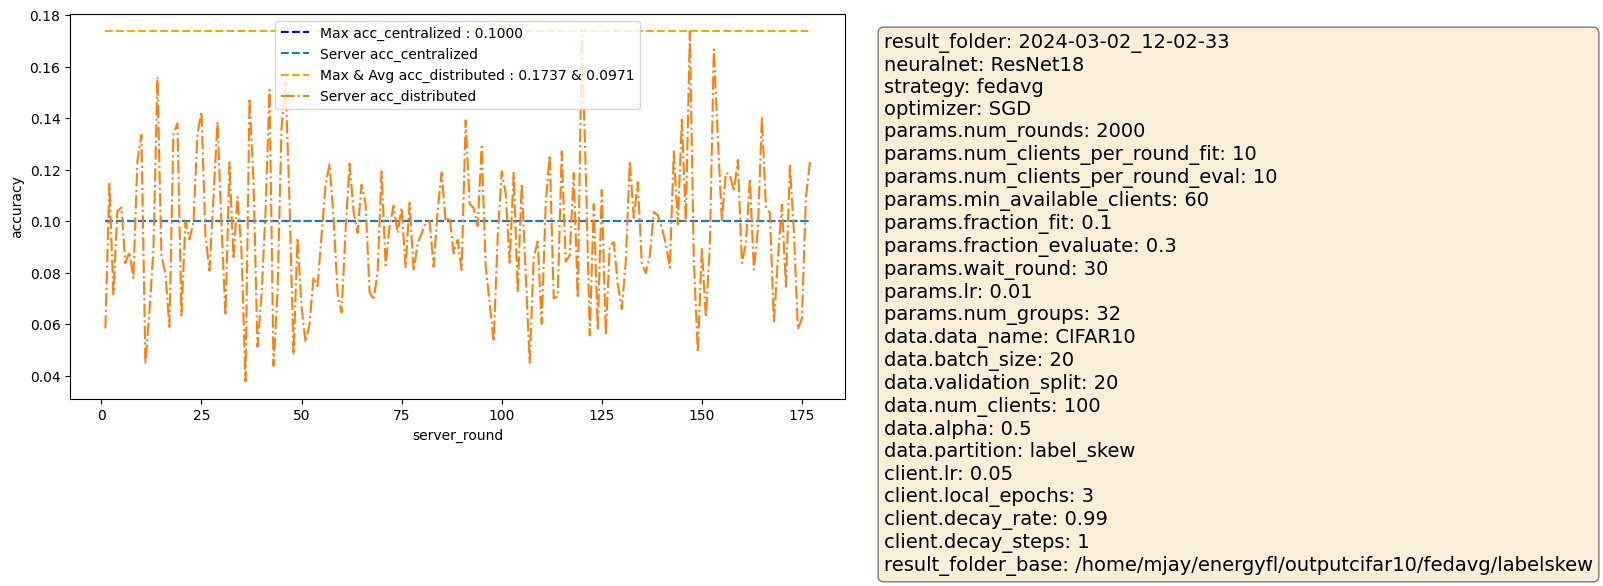

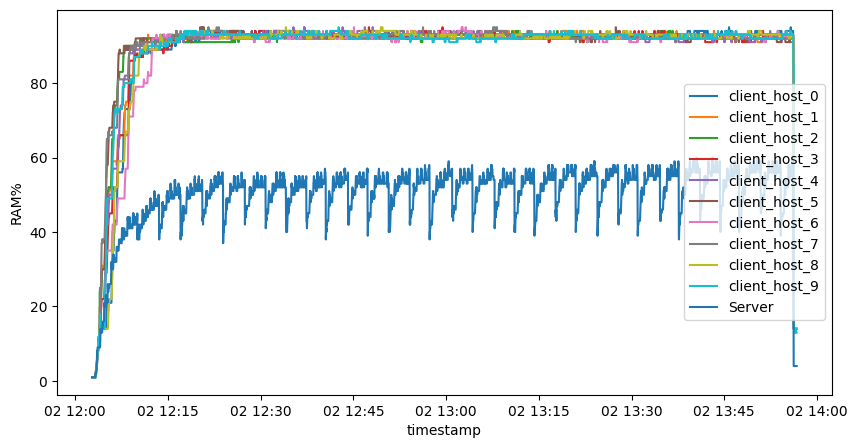

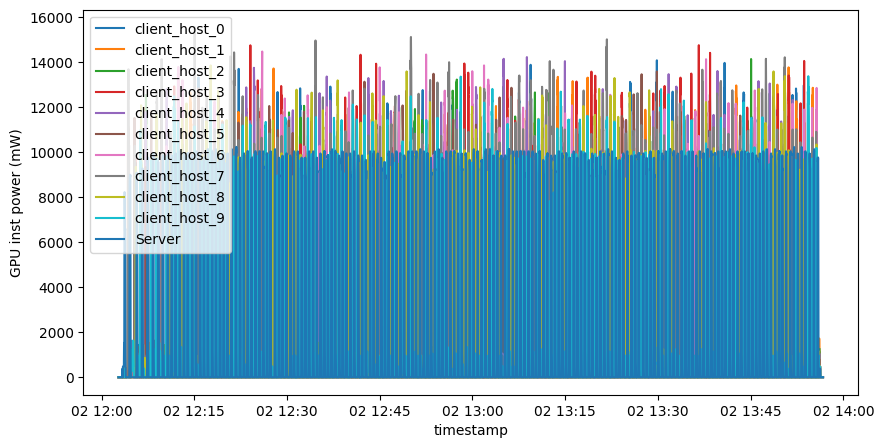

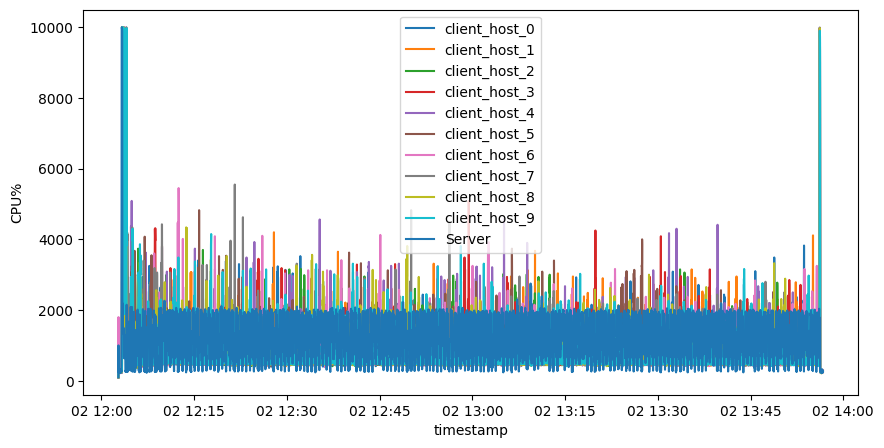

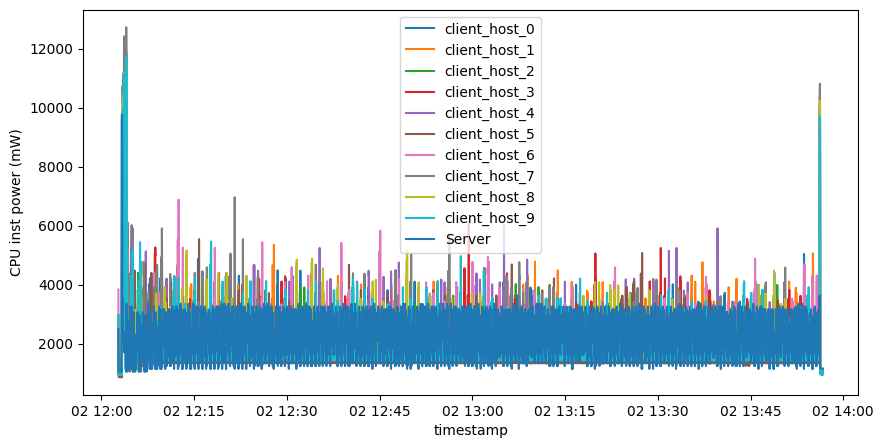

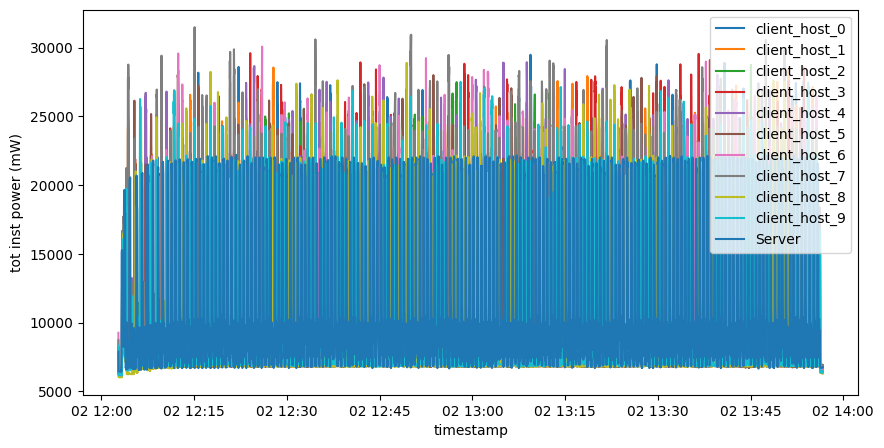

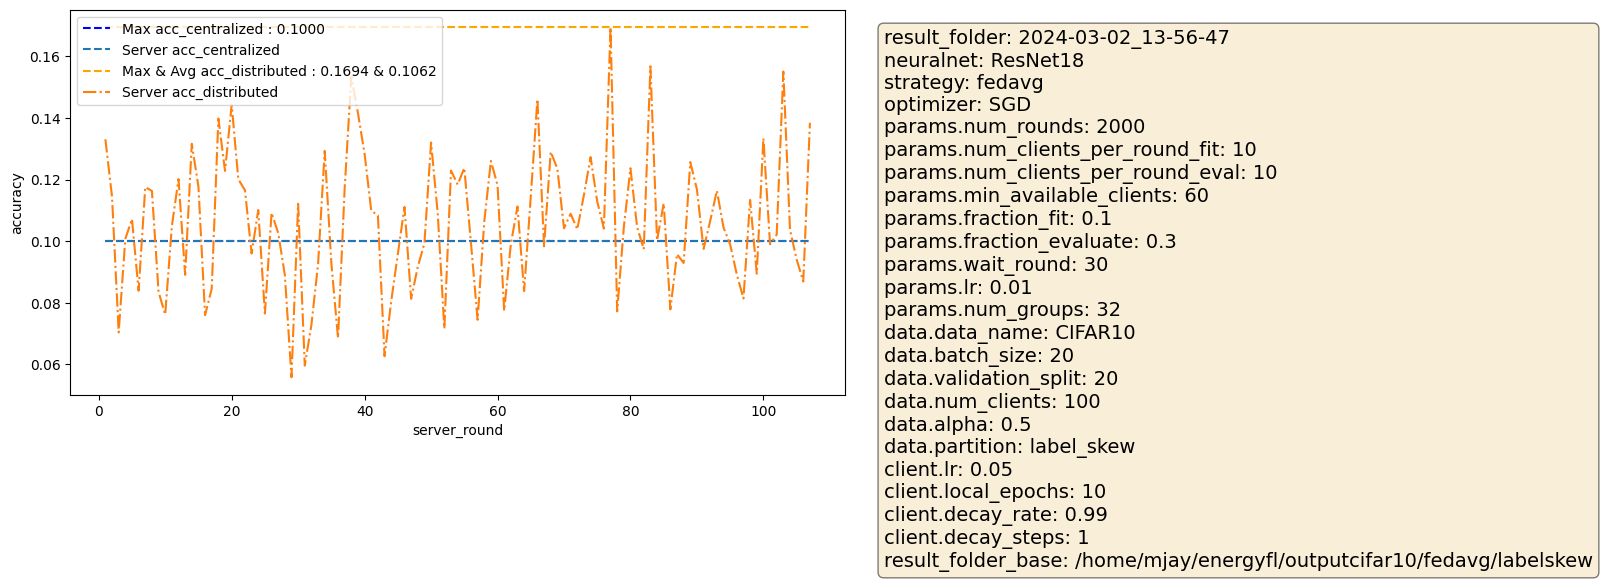

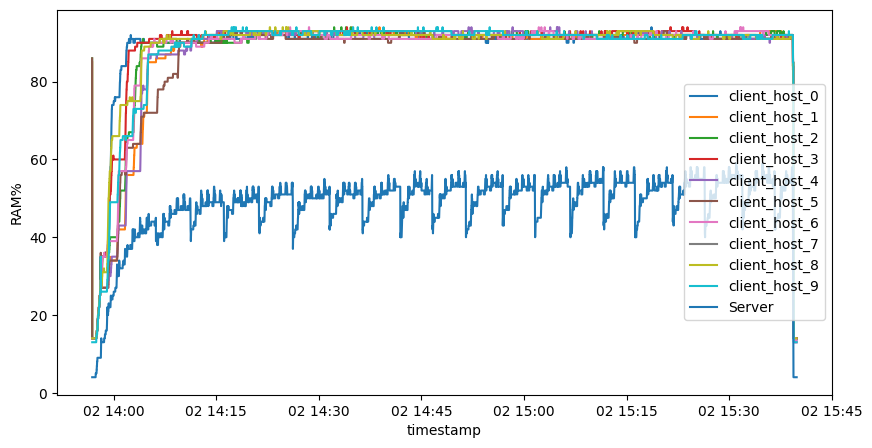

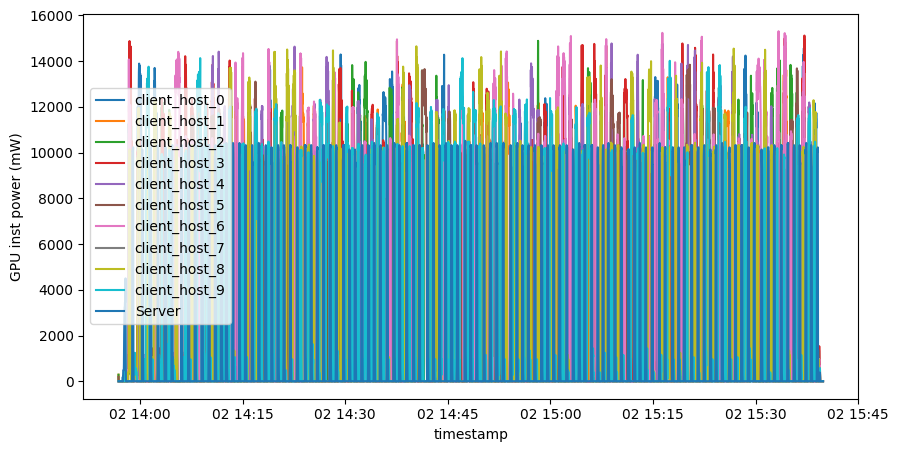

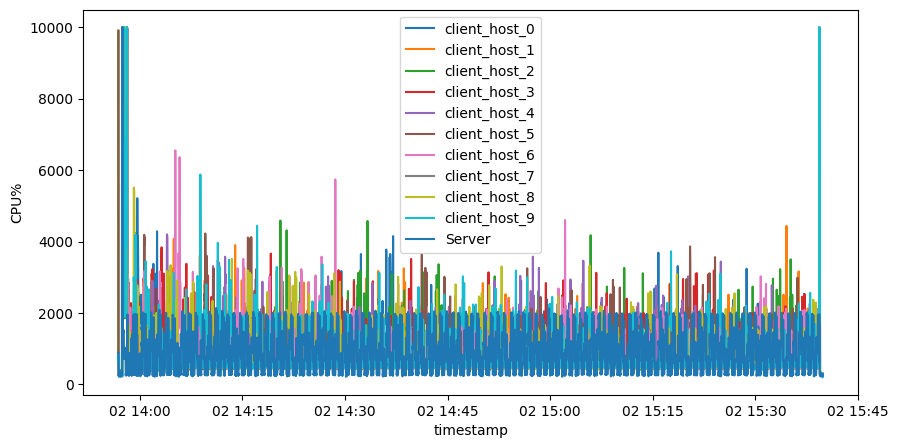

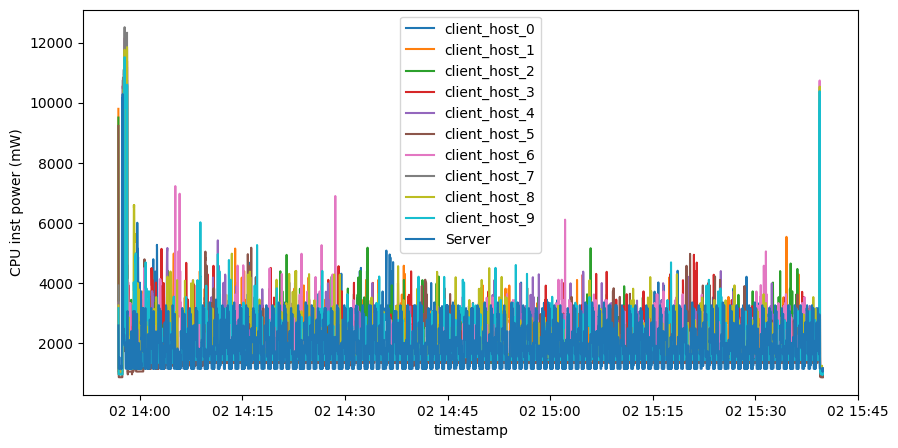

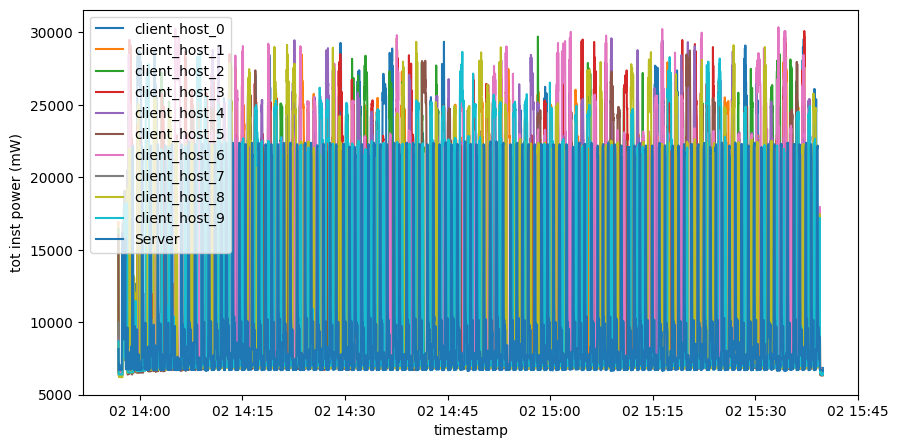

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_15-39-57/client_host_7/energy.csv'
Host 8 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_15-39-57/client_host_8/evalresult_client_98.csv'
Host 9 doesn't have any clients: list index out of range


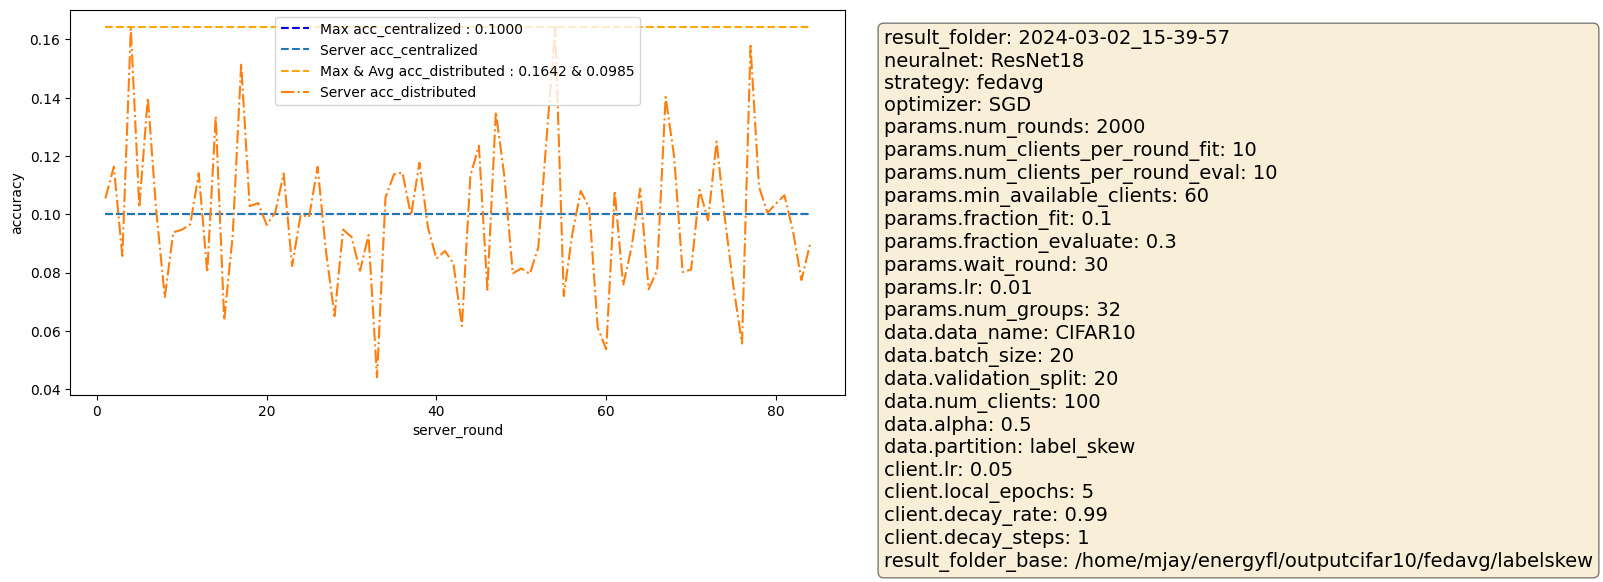

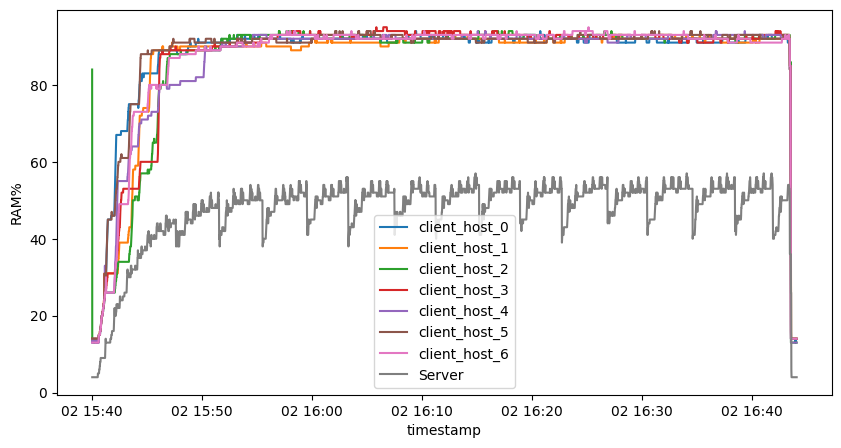

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_15-39-57/client_host_7/energy.csv'
Host 8 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_15-39-57/client_host_8/evalresult_client_98.csv'
Host 9 doesn't have any clients: list index out of range


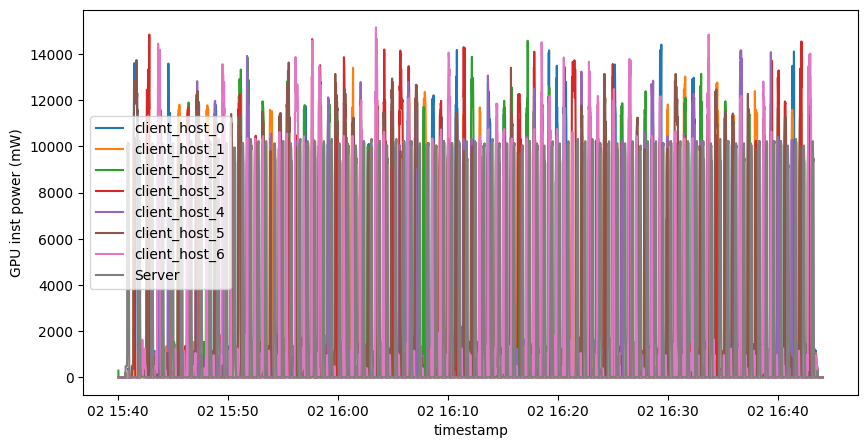

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_15-39-57/client_host_7/energy.csv'
Host 8 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_15-39-57/client_host_8/evalresult_client_98.csv'
Host 9 doesn't have any clients: list index out of range


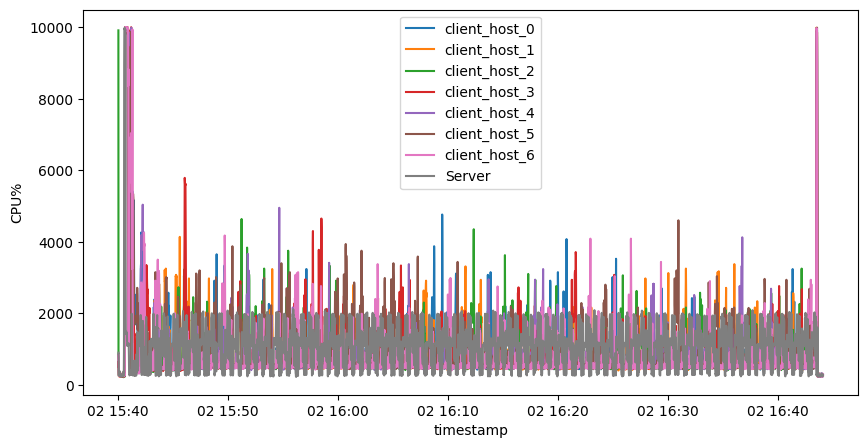

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_15-39-57/client_host_7/energy.csv'
Host 8 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_15-39-57/client_host_8/evalresult_client_98.csv'
Host 9 doesn't have any clients: list index out of range


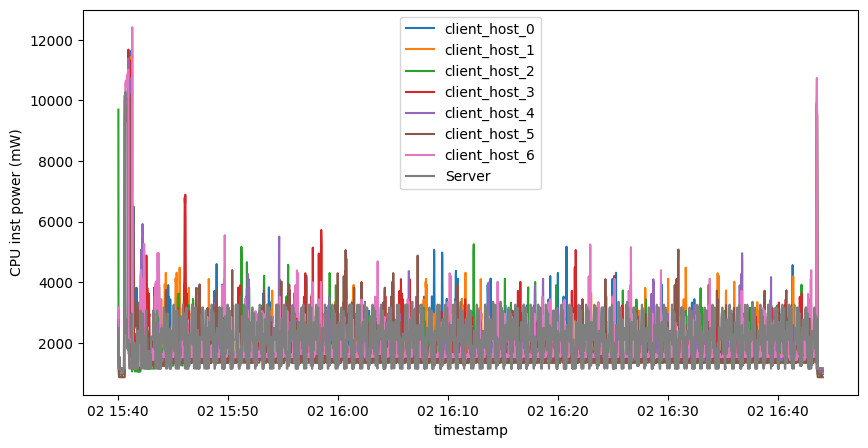

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_15-39-57/client_host_7/energy.csv'
Host 8 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_15-39-57/client_host_8/evalresult_client_98.csv'
Host 9 doesn't have any clients: list index out of range


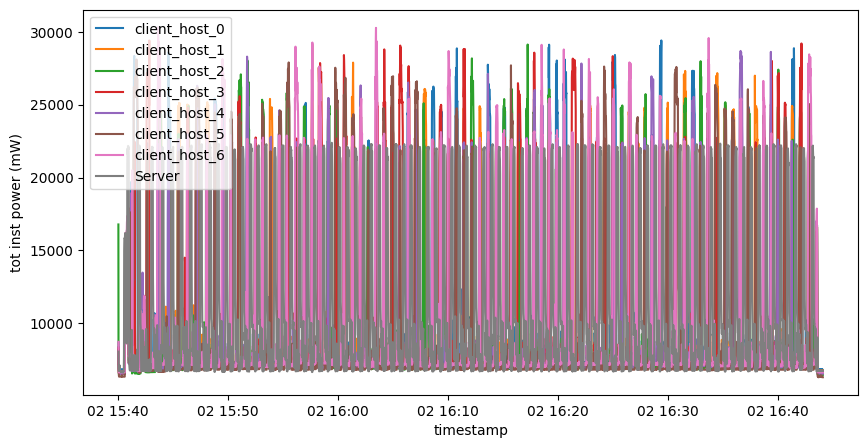

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_16-44-10/client_host_7/energy.csv'


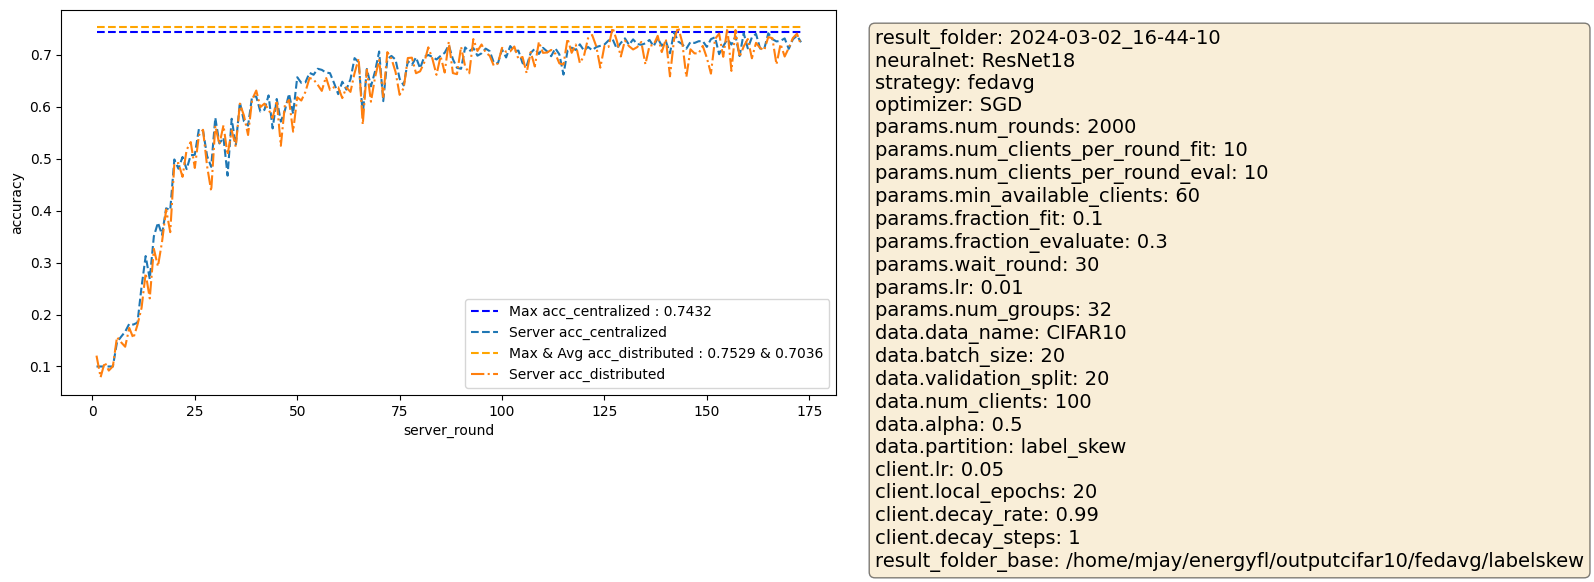

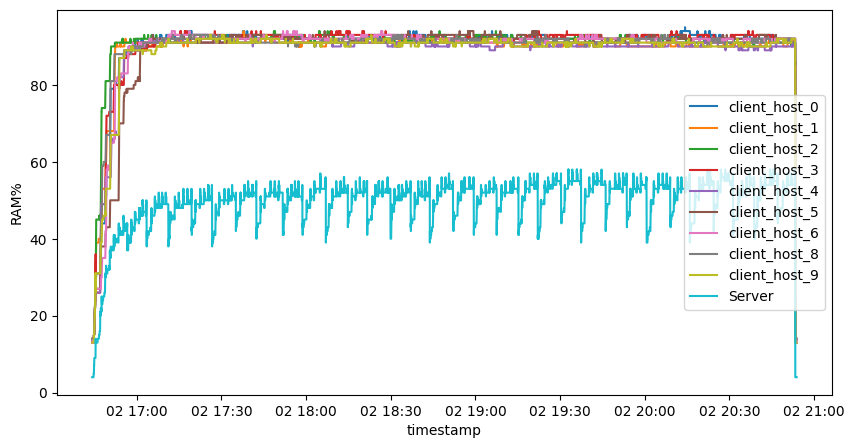

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_16-44-10/client_host_7/energy.csv'


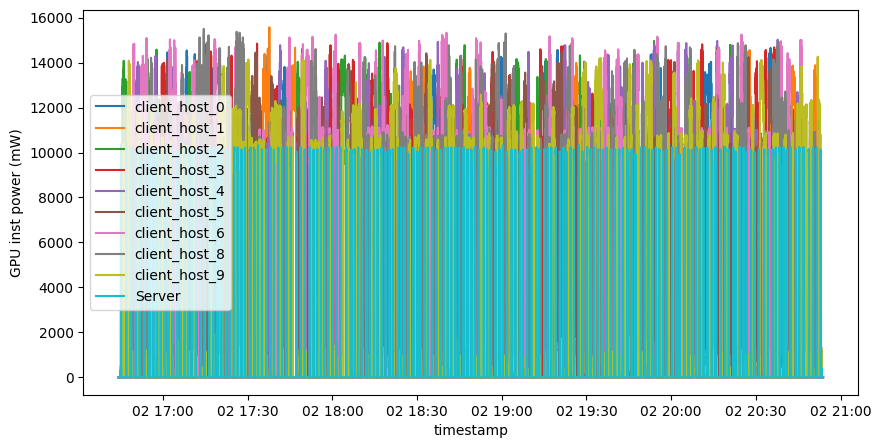

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_16-44-10/client_host_7/energy.csv'


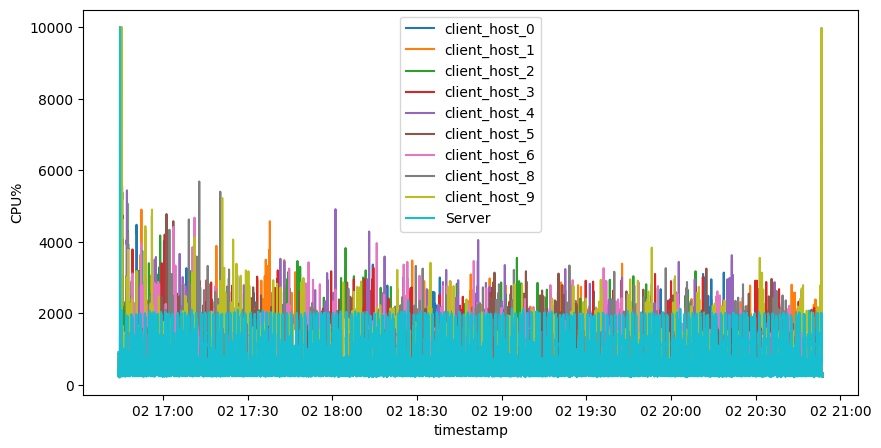

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_16-44-10/client_host_7/energy.csv'


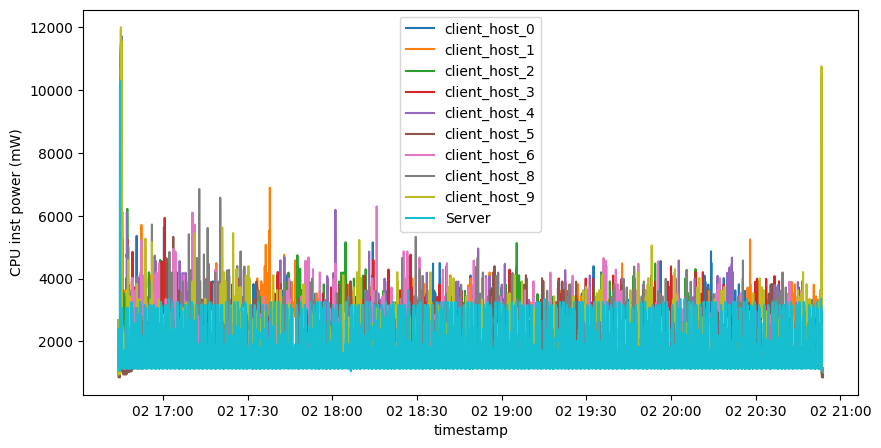

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_16-44-10/client_host_7/energy.csv'


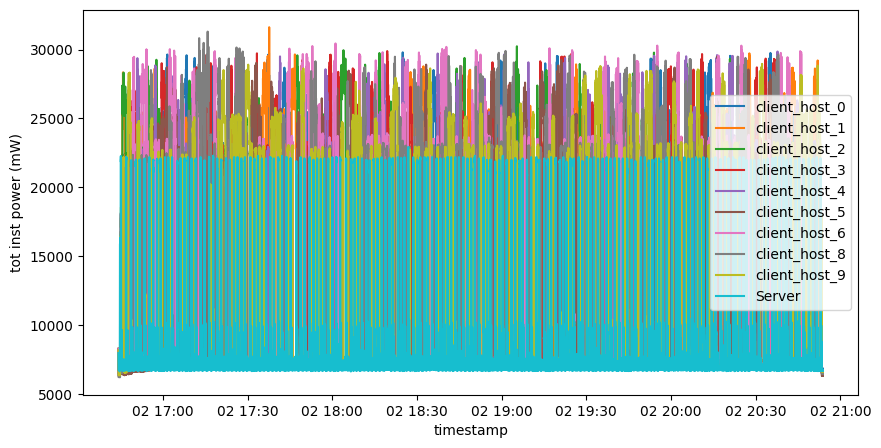

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_22-01-00/client_host_7/energy.csv'


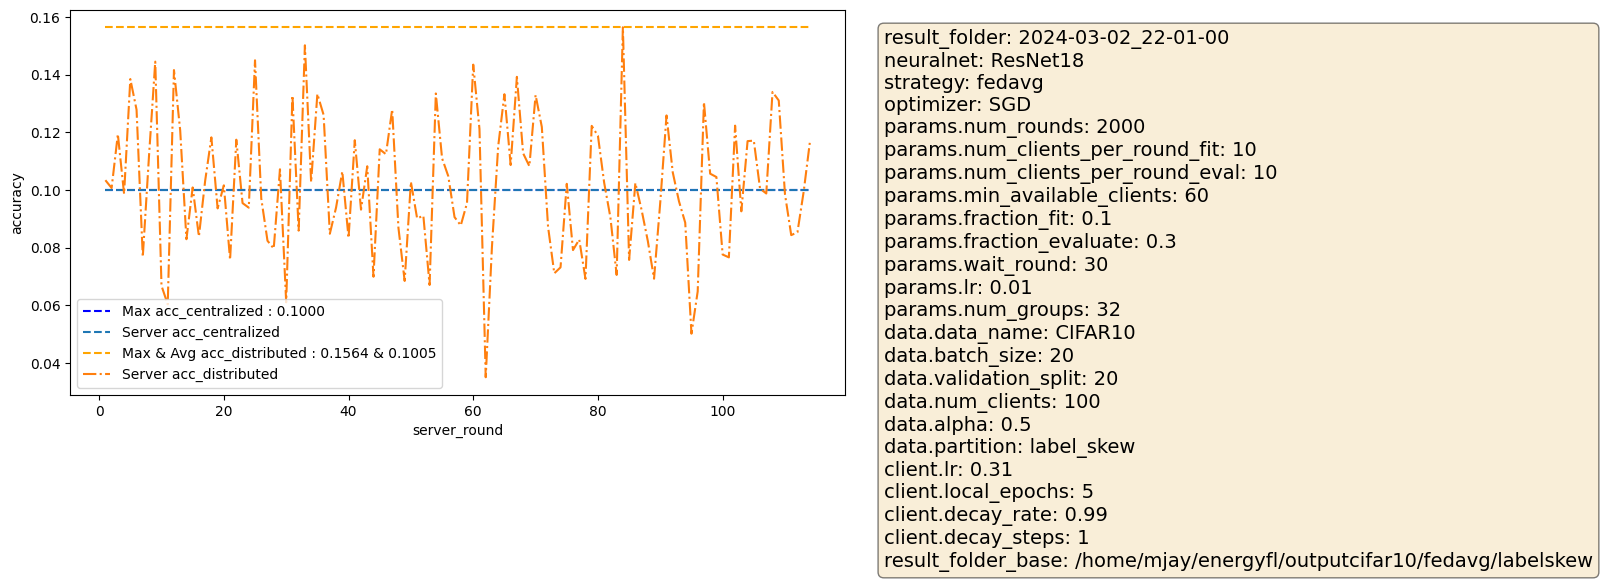

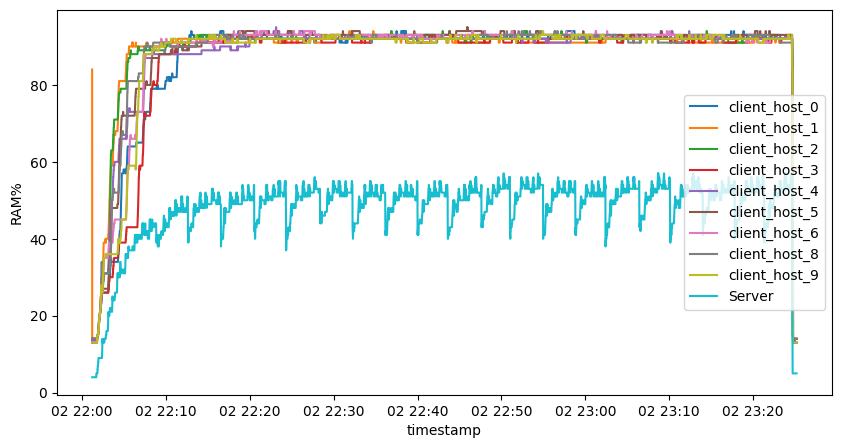

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_22-01-00/client_host_7/energy.csv'


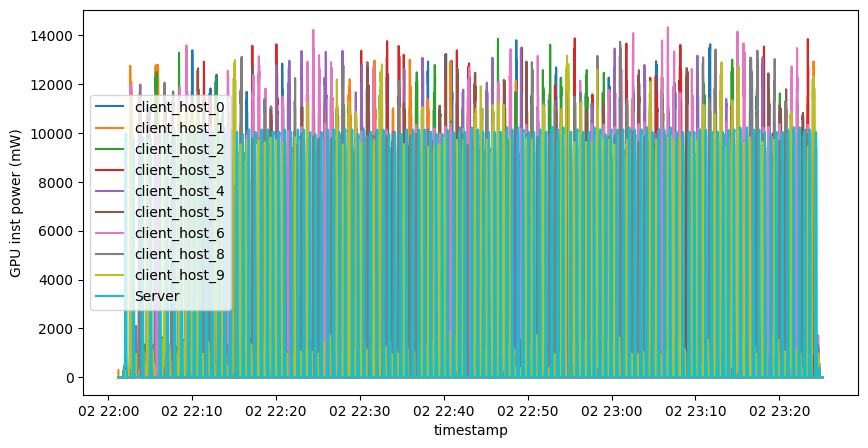

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_22-01-00/client_host_7/energy.csv'


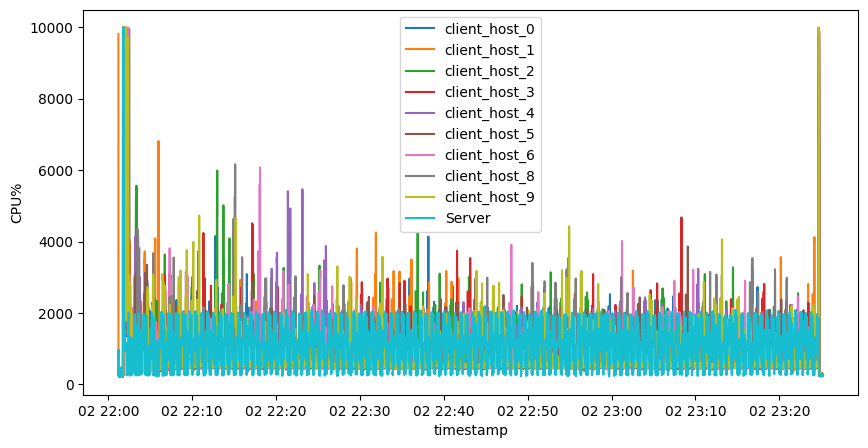

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_22-01-00/client_host_7/energy.csv'


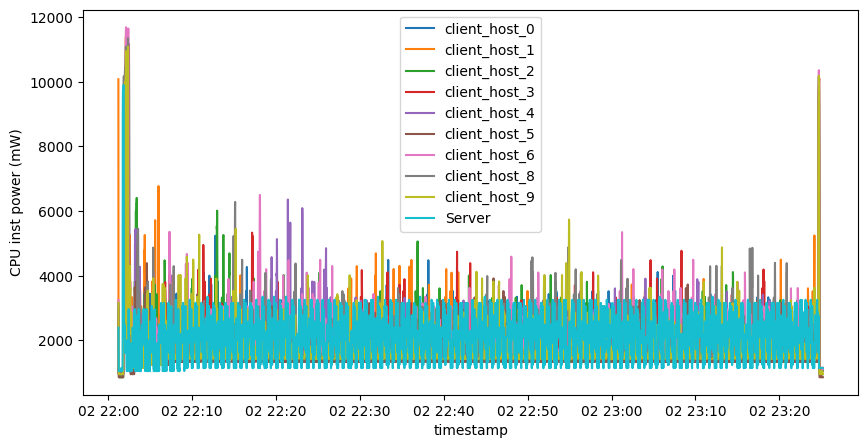

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_22-01-00/client_host_7/energy.csv'


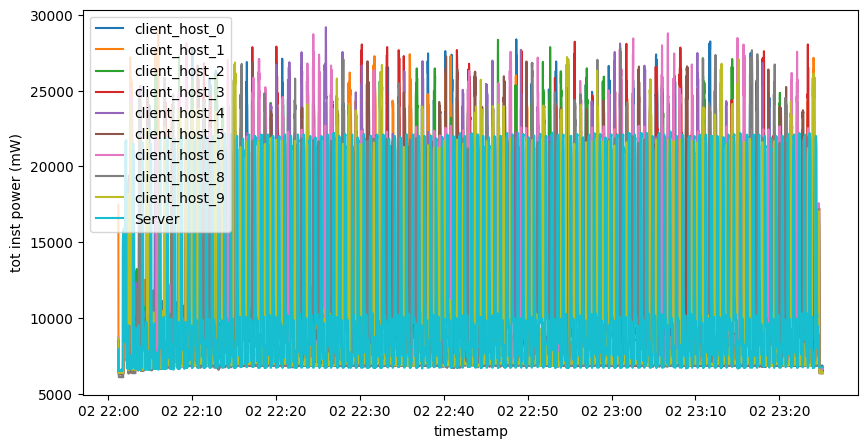

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_23-25-16/client_host_7/energy.csv'


ConversionError: Failed to convert value(s) to axis units: array(['2024-03-02T23:25:21.446004000', '2024-03-02T23:25:22.424486000',
       '2024-03-02T23:25:23.424117000', ...,
       '2024-03-03T01:47:05.103612000', '2024-03-03T01:47:06.104880000',
       '2024-03-03T01:47:07.104896000'], dtype='datetime64[ns]')

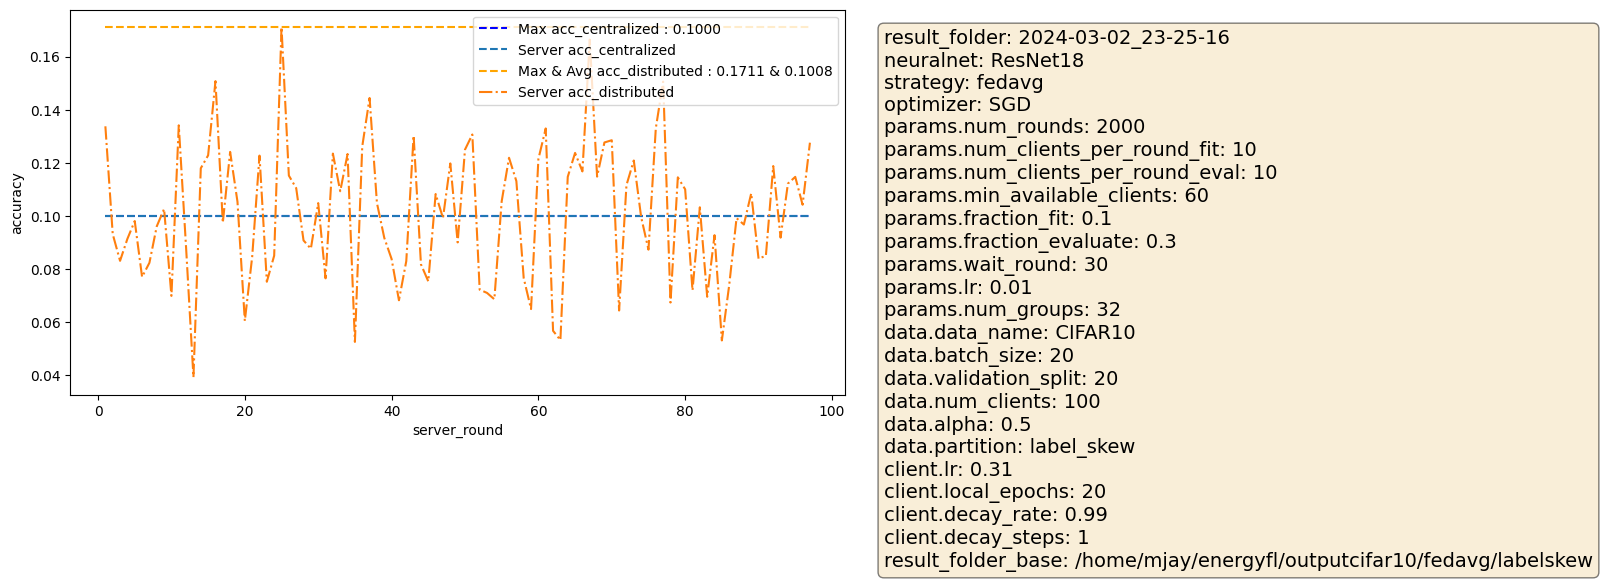

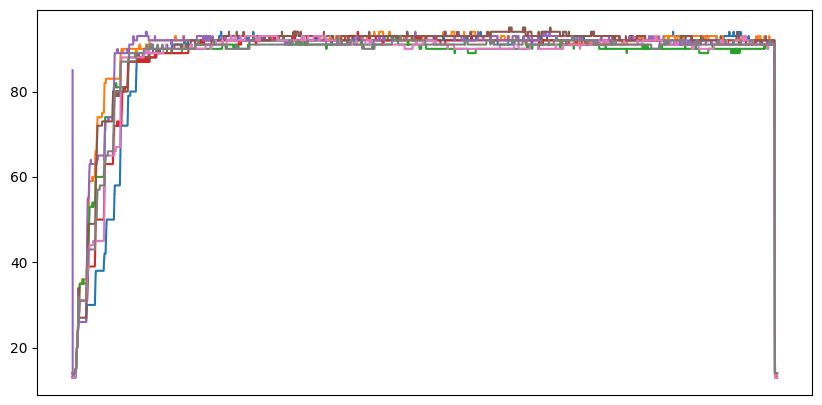

In [9]:
# summaryfile = read_summaryfile(summary_path)
# summaryfile = match_folder_csv(summaryfile, path_to_output)
# summaryfile = select_model(summaryfile, "ResNet18") # select only ResNet
results_dir_ls = summaryfile["result_folder"].tolist()
summaryfile_dict = summaryfile.to_dict(orient="records")
for (result_dir,config) in zip(results_dir_ls,summaryfile_dict):
    result = EnergyResult(result_dir,summaryfile)
    #result.make_energy_plot("energy",'timestamp',"tot avg power (mW)")
    config = config_drop(config)
    result.make_server_plot(config,centralized=True, **result_plot)
    result.make_energy_plot("energy",'timestamp',"RAM%")
    result.make_energy_plot("energy",'timestamp',"GPU inst power (mW)")
    result.make_energy_plot("energy",'timestamp',"CPU%")
    result.make_energy_plot("energy",'timestamp',"CPU inst power (mW)")
    result.make_energy_plot("energy",'timestamp',"tot inst power (mW)")

# Experiment energy

In [ ]:
outputs_path = [
    "/Users/mathildepro/Documents/code_projects/fl_logs/fedyogi/labelskew",
    "/Users/mathildepro/Documents/code_projects/fl_logs/fedavg/labelskew",
    "/Users/mathildepro/Documents/code_projects/fl_logs/fedadam/labelskew",
    "/Users/mathildepro/Documents/code_projects/fl_logs/fedadagrad/labelskew"
]
results = pd.DataFrame()
for path in outputs_path:
    perf_summary = pd.read_csv(os.path.join(path,"perf_summary.csv"))
    exp_summary = pd.read_csv(os.path.join(path,"experiment_summary.csv"))
    exp_summary["exp_id"] = exp_summary["result_folder"].apply(lambda x: x.split("/")[-1])
    perf_summary["exp_id"] = perf_summary["result_folder"].apply(lambda x: x.split("/")[-1])
    summary = exp_summary.merge(perf_summary, on="exp_id")
    results = pd.concat([results, summary], ignore_index=True)

In [ ]:
results.columns

Index(['result_folder_x', 'energy_file', 'server', 'sleep_duration',
       'neuralnet', 'strategy', 'optimizer', 'estats-11', 'estats-12',
       'estats-2', 'estats-3', 'estats-4', 'estats-5', 'estats-6', 'estats-7',
       'estats-8', 'estats-9', 'timestamps.start_experiment_before_sleep',
       'timestamps.start_experiment', 'timestamps.end_experiment',
       'timestamps.end_experiment_after_sleep', 'params.num_rounds',
       'params.num_clients_per_round_fit', 'params.num_clients_per_round_eval',
       'params.min_available_clients', 'params.fraction_fit',
       'params.fraction_evaluate', 'params.wait_round', 'params.lr',
       'params.num_groups', 'data.data_name', 'data.batch_size',
       'data.validation_split', 'data.num_clients', 'data.alpha',
       'data.partition', 'client.lr', 'client.local_epochs',
       'client.decay_rate', 'client.decay_steps', 'comm.host', 'comm.port',
       'exp_id', 'result_folder_y', 'clients_J', 'clients_kWh', 'server_J',
       'server_

In [ ]:
results["total_kWh"] = results["clients_kWh"] + results["server_kWh"]

In [ ]:
parameters = [
    "strategy", 
    'params.wait_round', 
    'data.batch_size', 
    'client.lr',
    'client.local_epochs', 
    ]
results.groupby(parameters)[["total_kWh"]].count().style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)

In [ ]:

perf_metrics = [
    "total_kWh",
    "max_centralized_accuracy", 
    "max_distributed_accuracy", 
    "round_number"
    ]
results.groupby(parameters)[perf_metrics].mean().style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)

In [ ]:
results[["data.batch_size"]].describe()

data.batch_size
count        26.000000
mean         29.461538
std          29.597609
min          20.000000
25%          20.000000
50%          20.000000
75%          20.000000
max         128.000000

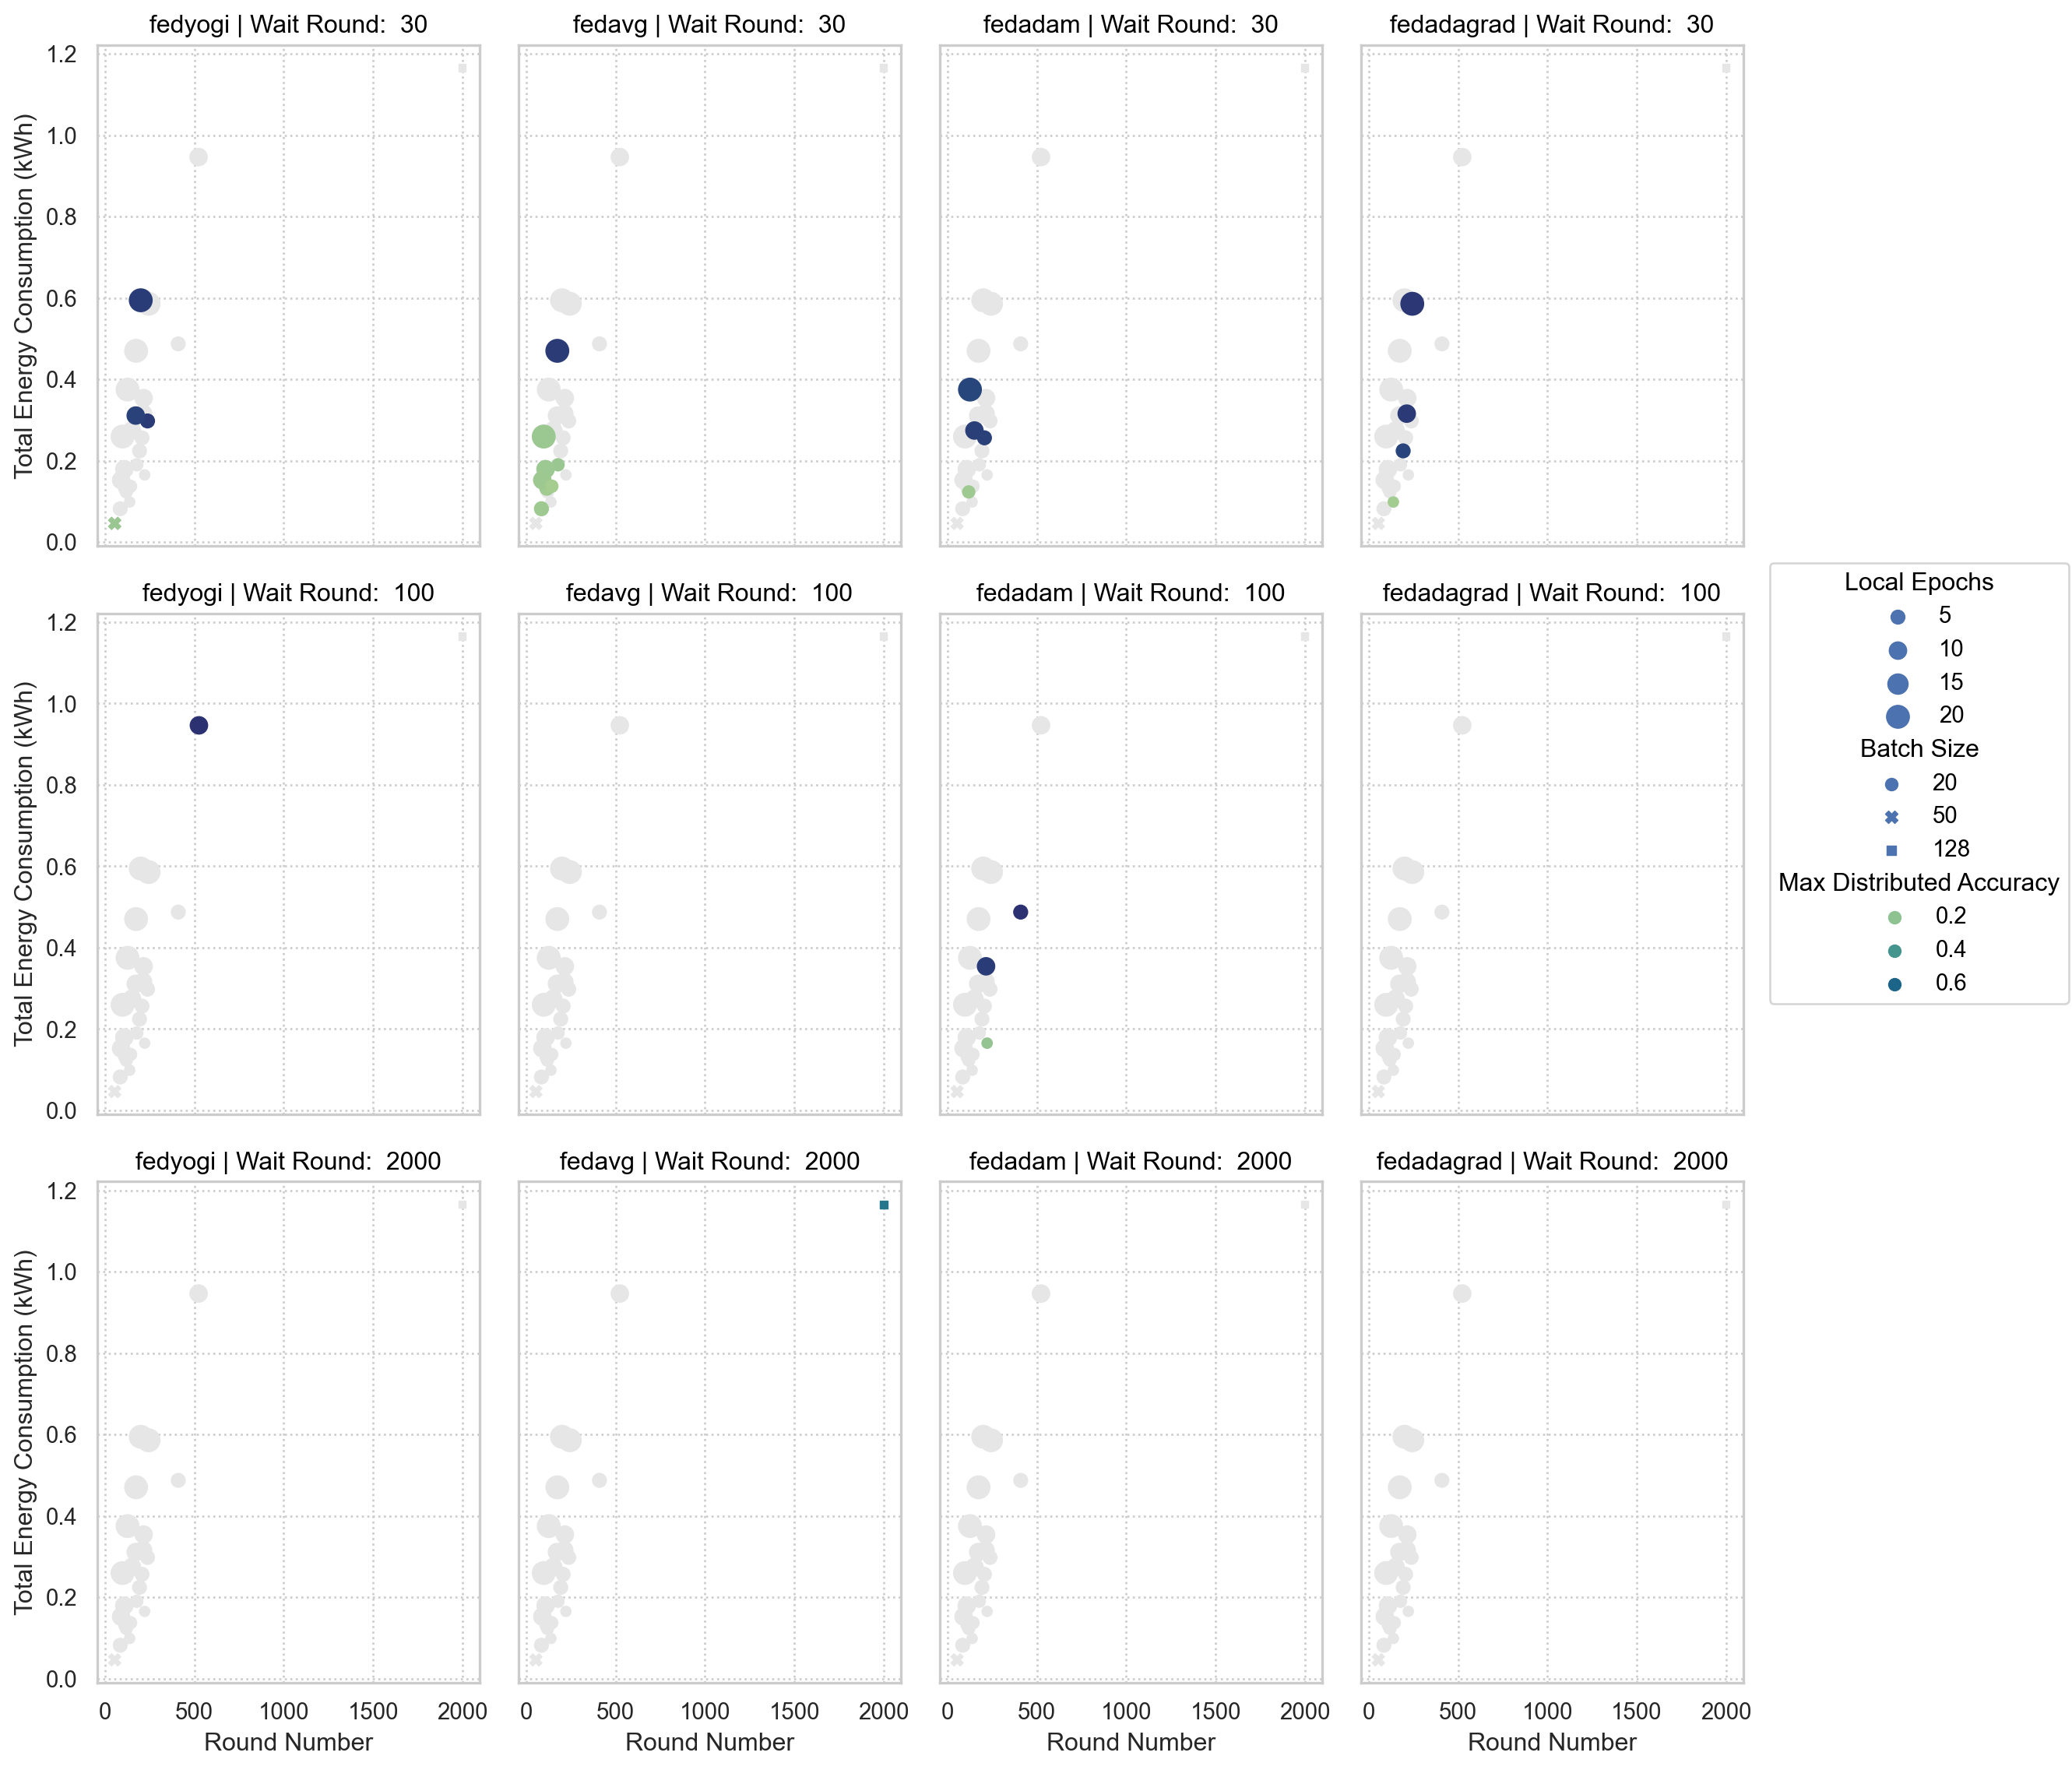

In [ ]:
plot_data = results #[results["max_centralized_accuracy"]>0.1]
f = plt.Figure(figsize=(12, 12))
(
    so.Plot(
        plot_data, x="round_number", y="total_kWh",
        pointsize="client.local_epochs", color="max_distributed_accuracy",
        marker="data.batch_size",
    )
    .facet(
        col="strategy",
        row="params.wait_round")
    .add(so.Dot(color=".9"), col=None, color=None, row=None)
    .add(so.Dot())
    .scale(
        pointsize=(5, 11), 
        color="crest")
    .label(
        x="Round Number", 
        y="Total Energy Consumption (kWh)", 
        pointsize="Local Epochs", 
        color="Max Distributed Accuracy", 
        row="Wait Round: ", 
        marker="Batch Size",
        bbox_to_anchor=(1.05, 1),
        #col="Strategy:"
    )
    .layout(engine="tight")
    .on(f)
)

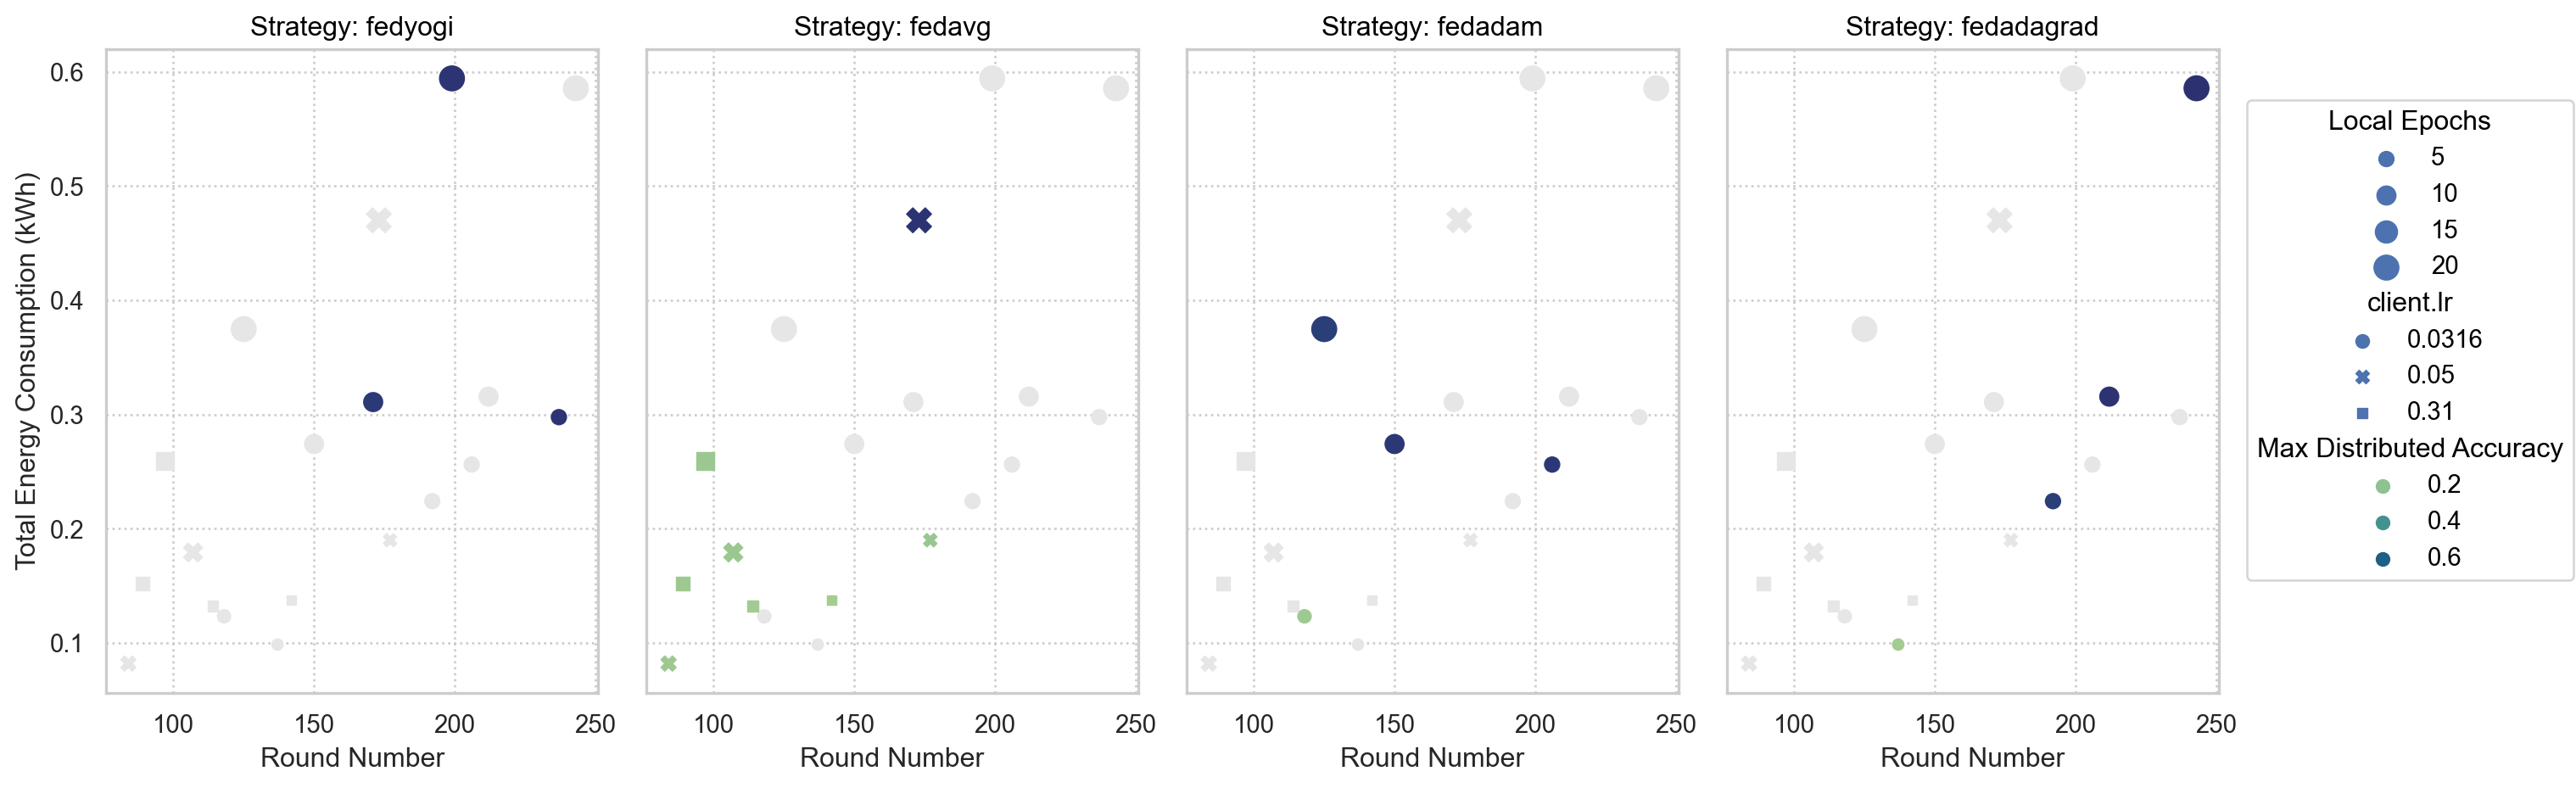

In [ ]:
plot_data = results[(results["data.batch_size"] == 20)&(results["params.wait_round"] == 30)]  
sf1 = plt.Figure(figsize=(14, 5))
(
    so.Plot(
        plot_data, x="round_number", y="total_kWh",
        pointsize="client.local_epochs", color="max_distributed_accuracy",
        marker="client.lr"
    )
    .facet(col="strategy",)
    .add(so.Dot(color=".9"), col=None, color=None)
    .add(so.Dot())
    .scale(pointsize=(5, 11), color="crest")
    .label(x="Round Number", y="Total Energy Consumption (kWh)",col="Strategy:", pointsize="Local Epochs", color="Max Distributed Accuracy", marker="Learning Rate")
    .layout(engine="tight")
    .on(sf1)
)
# sf1.legend(bbox_to_anchor=(1.05, 1))

Those last graphs show the relationship between the number of local epochs, the strategy, the number of rounds and the energy consumption. The main observation is that the algorithm needs a minimum number of local epochs to learn. For most strategy, 5 local epochs leads to no learning, and a max accuracy below 0.2. And for fedavg, the algorithm requires at least 20 local epochs to reach an accuracy higher than 0.6. 
Other observations:
- reaching an accuracy higher than 0.6 requires in average more energy and more rounds, which can be expected. It seems that there are only two scenarios: it doesn't learn at all and is stoped very early by wait_round, or it reaches the target accuracy 0.7. The second option systematically consumes more energy, but not significantly more. 
- The higher the number of local epochs, the higher the energy consumption. Even accross stragetes, the number of local epochs seems to be the most impactfull parameters regarding the total energy consumption. One exception is for fedavg and a lr of 0.05. 
- The number of rounds is not proportional to the energy consumption. Maybe we could have a look at the total number of local epochs (local epochs times the number of rounds)?

Il n'y a pas deux expériences avec les mêmes paramètres donc on ne peux pas savoir l'impact de la variabilité de l'entraînement : est ce que les différences entre les résultats sont dus aux paramètres ou aux aléa de l'entraînement ? Il faudrait faire tourner les experiences au moins 5 fois, quitte à mettre un early stopping sur le nombre de rounds et pas seulement avec le wait round. 

## Studying energy per rounds

In [ ]:
results_dir_ls = summaryfile["result_folder"].tolist()
summaryfile_dict = summaryfile.to_dict(orient="records")
for (result_dir,config) in zip(results_dir_ls,summaryfile_dict):
    result = EnergyResult(result_dir,summaryfile)
    #result.make_energy_plot("energy",'timestamp',"tot avg power (mW)")
    config = config_drop(config)
    # result.make_server_plot(config,centralized=True, **result_plot)
    break

In [ ]:
hostmetadata = result._get_selectedclient_in_host()
len(hostmetadata)

10

In [ ]:
client_results = result.clients_results()
training_results = pd.DataFrame()
clients = []
hostmetadata = result._get_selectedclient_in_host()
for hid in range(len(hostmetadata)):

    hostinfo = result._read_client_host(hid)
    hostname = hostinfo.hostname
    client_data = hostinfo.clients
    for client in client_data:
        res = client_data[client]
            
        client_res = res.fittimes.merge(res.fitresults, left_on="Server Round", right_on="server_round")
        drop_col = ["Local Epochs", "Server Round", "LR", "time"]
        client_res = client_res.drop(columns=drop_col)
        client_res["round_role"] = "train"
        cid = client_res["Client ID"].unique()[0]
        res.results.rename(columns={col:"eval_"+col for col in res.results.columns if col!="server_round"}, inplace=True)
        res.results["Client ID"] = cid
        res.results["round_role"] = "eval"
        client_res = pd.concat([client_res, res.results])
        client_res["hostname"] = hostname
        training_results = pd.concat([training_results, client_res])

In [ ]:
training_results.head()

Client ID          Start Time            End Time  fittime  server_round  \
0          8 2024-02-29 17:57:59 2024-02-29 17:58:06      7.0             7   
1          8 2024-02-29 17:59:12 2024-02-29 17:59:17      5.0             9   
2          8 2024-02-29 17:59:42 2024-02-29 17:59:45      3.0            10   
3          8 2024-02-29 18:08:52 2024-02-29 18:08:58      6.0            28   
4          8 2024-02-29 18:20:00 2024-02-29 18:20:03      3.0            51   

   train_loss  train_acc  val_loss   val_acc    lr  local_epochs round_role  \
0    1.369679   0.655238  1.407954  0.555556  0.03           3.0      train   
1    1.331317   0.655238  1.494494  0.555556  0.03           3.0      train   
2    1.398849   0.655238  1.445333  0.555556  0.03           3.0      train   
3    1.298476   0.655238  1.472835  0.555556  0.03           3.0      train   
4    1.317595   0.655238  1.519566  0.555556  0.03           3.0      train   

  eval_time  eval_loss  eval_accuracy       hostname  
0       NaT        NaN            NaN  client_host_0  
1       NaT        NaN            NaN  client_host_0  
2       NaT        NaN            NaN  client_host_0  
3       NaT        NaN            NaN  client_host_0  
4       NaT        NaN            NaN  client_host_0

In [ ]:
training_results.groupby(["server_round"]).count()["train_loss"].unique()

array([10])

In [ ]:
training_results.groupby(["server_round"]).count()["eval_loss"].unique()

array([30])

In [ ]:
len(training_results["server_round"].unique())


53

In [ ]:
def style_round_role(role):
    return 'background-color:lightgreen;' if role == "train" else 'background-color:red;'

In [ ]:
training_results[(training_results["server_round"]<3)&(training_results["server_round"]>1)].groupby(["server_round", "hostname", "Client ID"]).first()[["round_role"]].style.map(style_round_role)

In [ ]:
nb_client_per_round_per_host = training_results[training_results["round_role"]=="train"].groupby(["hostname", "server_round"]).count()[["train_loss"]].rename(columns={"train_loss":"count"}) #.style.map(style_round_role)
nb_client_per_round_per_host.reset_index().describe()


server_round       count
count    353.000000  353.000000
mean      27.427762    1.501416
std       15.189748    0.739028
min        1.000000    1.000000
25%       15.000000    1.000000
50%       27.000000    1.000000
75%       41.000000    2.000000
max       53.000000    5.000000

Sur cette expérience, en moyenne il y a 1.5 clients par hosts (si il y a un client actif sur le host) avec au maximum 5 clients actifs sur un host. 

In [ ]:
nb_client_per_round_per_host.reset_index().groupby(["hostname"]).count().describe()

server_round      count
count     10.000000  10.000000
mean      35.300000  35.300000
std        2.983287   2.983287
min       31.000000  31.000000
25%       33.250000  33.250000
50%       35.000000  35.000000
75%       37.500000  37.500000
max       40.000000  40.000000

En moyenne, les hosts sont actifs sur 35 rounds, sachant qu'il y en a 53. Donc ils sont actifs 66% du temps.

Le problème c'est que les clients ont potentiellement des start time et end time différents, même si ils sont sur le même host. 
Deuxième problème, pour les rounds sans clients, on n'a pas de timestamp.

In [ ]:
training_results["fittime"].describe()


count    530.000000
mean       3.862264
std        2.397599
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       17.000000
Name: fittime, dtype: float64

In [ ]:
fittime_stats

hostname  server_round  (fittime, var)  (fittime, mean)  \
0    client_host_0             2            40.5              6.5   
1    client_host_0             2            40.5              6.5   
2    client_host_2             2             NaN              3.0   
3    client_host_3             2             NaN              3.0   
4    client_host_5             2             NaN             11.0   
..             ...           ...             ...              ...   
525  client_host_5            52             NaN              4.0   
526  client_host_7            52             0.0              4.0   
527  client_host_7            52             0.0              4.0   
528  client_host_8            52             NaN              2.0   
529  client_host_9            52             NaN              4.0   

     (fittime, count)  Client ID          Start Time            End Time  \
0                   2          5 2024-02-29 17:54:16 2024-02-29 17:54:18   
1                   2          3 2024-02-29 17:54:17 2024-02-29 17:54:28   
2                   1         26 2024-02-29 17:54:16 2024-02-29 17:54:19   
3                   1         35 2024-02-29 17:54:17 2024-02-29 17:54:20   
4                   1         50 2024-02-29 17:54:17 2024-02-29 17:54:28   
..                ...        ...                 ...                 ...   
525                 1         57 2024-02-29 18:20:29 2024-02-29 18:20:33   
526                 2         77 2024-02-29 18:20:29 2024-02-29 18:20:33   
527                 2         71 2024-02-29 18:20:29 2024-02-29 18:20:33   
528                 1         82 2024-02-29 18:20:28 2024-02-29 18:20:30   
529                 1         98 2024-02-29 18:20:29 2024-02-29 18:20:33   

     fittime  train_loss  train_acc  val_loss   val_acc    lr  local_epochs  \
0        2.0    2.330787   0.317610  2.088300  0.375000  0.03           3.0   
1       11.0    1.912005   0.307407  2.117987  0.250000  0.03           3.0   
2        3.0    1.113651   0.783242  0.296451  0.928571  0.03           3.0   
3        3.0    1.734409   0.311216  1.913203  0.242424  0.03           3.0   
4       11.0    0.888687   0.766807  1.220144  0.680000  0.03           3.0   
..       ...         ...        ...       ...       ...   ...           ...   
525      4.0    1.326796   0.577904  1.329392  0.540541  0.03           3.0   
526      4.0    1.839277   0.384615  2.027118  0.280000  0.03           3.0   
527      4.0    1.813637   0.283613  1.539339  0.480000  0.03           3.0   
528      2.0    1.537594   0.514894  1.119330  0.666667  0.03           3.0   
529      4.0    1.369836   0.586847  0.950454  0.741935  0.03           3.0   

    round_role eval_time  eval_loss  eval_accuracy  \
0        train       NaT        NaN            NaN   
1        train       NaT        NaN            NaN   
2        train       NaT        NaN            NaN   
3        train       NaT        NaN            NaN   
4        train       NaT        NaN            NaN   
..         ...       ...        ...            ...   
525      train       NaT        NaN            NaN   
526      train       NaT        NaN            NaN   
527      train       NaT        NaN            NaN   
528      train       NaT        NaN            NaN   
529      train       NaT        NaN            NaN   

     avg_client_per_host_per_round  
0                              2.0  
1                              2.0  
2                              2.0  
3                              2.0  
4                              2.0  
..                             ...  
525                            2.0  
526                            2.0  
527                            2.0  
528                            2.0  
529                            2.0  

[530 rows x 20 columns]

In [ ]:
fittime_stats = training_results[training_results["round_role"]=="train"].groupby(["hostname", "server_round"])[["fittime"]].agg({"mean", "var", "count"})
fittime_stats.columns = fittime_stats.columns.to_flat_index()
fittime_stats = fittime_stats.reset_index()
fittime_stats #.groupby([('fittime', 'count')])[[('fittime', 'mean')]].agg({"mean", "var", "min", "max", "count"})

hostname  server_round  (fittime, var)  (fittime, mean)  \
0    client_host_0             2           40.50             6.50   
1    client_host_0             4             NaN             2.00   
2    client_host_0             5             NaN             3.00   
3    client_host_0             6             NaN             3.00   
4    client_host_0             7            6.25             5.75   
..             ...           ...             ...              ...   
348  client_host_9            47             NaN             2.00   
349  client_host_9            49             NaN             3.00   
350  client_host_9            50            1.00             6.00   
351  client_host_9            52             NaN             4.00   
352  client_host_9            53             NaN             2.00   

     (fittime, count)  
0                   2  
1                   1  
2                   1  
3                   1  
4                   4  
..                ...  
348                 1  
349                 1  
350                 3  
351                 1  
352                 1  

[353 rows x 5 columns]

In [ ]:
fittime_stats = training_results[training_results["round_role"]=="train"].merge(fittime_stats, on=["hostname", "server_round"])

In [ ]:
to_merge = fittime_stats.groupby(["server_round"])[[("fittime", "count")]].mean().reset_index().rename(columns={("fittime", "count"):"avg_client_per_host_per_round"})
fittime_stats = fittime_stats.merge(to_merge, on="server_round")

In [ ]:
fittime_stats

Client ID          Start Time            End Time  fittime  server_round  \
0            8 2024-02-29 17:57:59 2024-02-29 17:58:06      7.0             7   
1            6 2024-02-29 17:58:00 2024-02-29 17:58:07      7.0             7   
2            4 2024-02-29 17:58:01 2024-02-29 17:58:08      7.0             7   
3            1 2024-02-29 17:57:59 2024-02-29 17:58:01      2.0             7   
4           10 2024-02-29 17:58:01 2024-02-29 17:58:07      6.0             7   
..         ...                 ...                 ...      ...           ...   
525         57 2024-02-29 18:20:29 2024-02-29 18:20:33      4.0            52   
526         77 2024-02-29 18:20:29 2024-02-29 18:20:33      4.0            52   
527         71 2024-02-29 18:20:29 2024-02-29 18:20:33      4.0            52   
528         82 2024-02-29 18:20:28 2024-02-29 18:20:30      2.0            52   
529         98 2024-02-29 18:20:29 2024-02-29 18:20:33      4.0            52   

     train_loss  train_acc  val_loss   val_acc    lr  local_epochs round_role  \
0      1.369679   0.655238  1.407954  0.555556  0.03           3.0      train   
1      1.958377   0.252427  1.452039  0.555556  0.03           3.0      train   
2      1.253835   0.551859  1.170533  0.653846  0.03           3.0      train   
3      1.718747   0.397661  1.319661  0.625000  0.03           3.0      train   
4      1.770296   0.296236  1.672489  0.218750  0.03           3.0      train   
..          ...        ...       ...       ...   ...           ...        ...   
525    1.326796   0.577904  1.329392  0.540541  0.03           3.0      train   
526    1.839277   0.384615  2.027118  0.280000  0.03           3.0      train   
527    1.813637   0.283613  1.539339  0.480000  0.03           3.0      train   
528    1.537594   0.514894  1.119330  0.666667  0.03           3.0      train   
529    1.369836   0.586847  0.950454  0.741935  0.03           3.0      train   

    eval_time  eval_loss  eval_accuracy       hostname  (fittime, var)  \
0         NaT        NaN            NaN  client_host_0            6.25   
1         NaT        NaN            NaN  client_host_0            6.25   
2         NaT        NaN            NaN  client_host_0            6.25   
3         NaT        NaN            NaN  client_host_0            6.25   
4         NaT        NaN            NaN  client_host_1            4.00   
..        ...        ...            ...            ...             ...   
525       NaT        NaN            NaN  client_host_5             NaN   
526       NaT        NaN            NaN  client_host_7            0.00   
527       NaT        NaN            NaN  client_host_7            0.00   
528       NaT        NaN            NaN  client_host_8             NaN   
529       NaT        NaN            NaN  client_host_9             NaN   

     (fittime, mean)  (fittime, count)  avg_client_per_host_per_round  
0               5.75                 4                            3.0  
1               5.75                 4                            3.0  
2               5.75                 4                            3.0  
3               5.75                 4                            3.0  
4               6.00                 3                            3.0  
..               ...               ...                            ...  
525             4.00                 1                            2.0  
526             4.00                 2                            2.0  
527             4.00                 2                            2.0  
528             2.00                 1                            2.0  
529             4.00                 1                            2.0  

[530 rows x 20 columns]

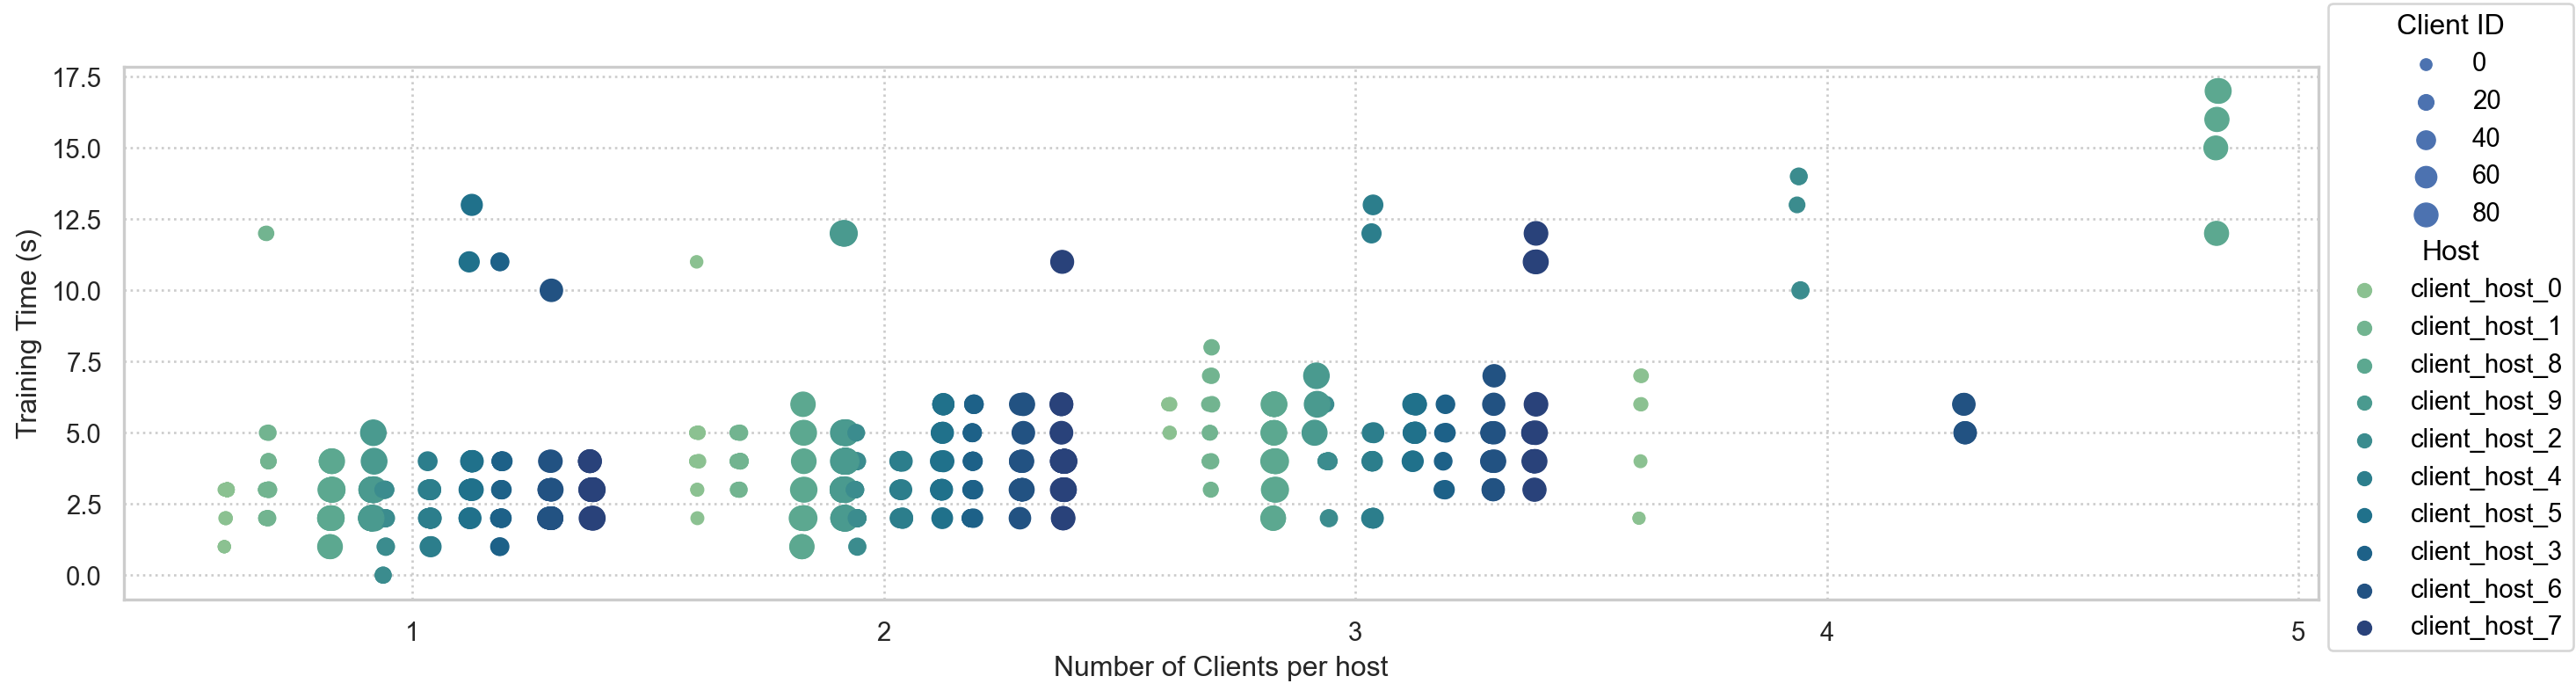

In [ ]:
sf1 = plt.Figure(figsize=(14, 4))
(
    so.Plot(
        # fittime_stats[fittime_stats["server_round"]<12], x="server_round", y="fittime",
        # pointsize=('fittime', 'count'), color="Client ID",
        fittime_stats, x=('fittime', 'count'), y="fittime",
         pointsize="Client ID", color="hostname",
    )
    # .facet(col=('fittime', 'count'))
    .add(so.Dot(), so.Dodge())
    .layout(engine="tight")
    .scale(color="crest", pointsize=(5, 11))
    .label(x="Number of Clients per host", y="Training Time (s)", color="Host")
    .on(sf1)
)

Here we can see that in average the training time increases with the number of client per host. However there are always outliers with a training time twice as long. It doesn't seem to be related to the client or the host anyway. The variance doesn't seem to be increasing with the number of client per host.

ok one thing that's sure is that the training time is different for two client training at the same time on the same host. so what do we do? I guess we are going to need to look at the processes. In the midtime, we can gather the energy between the minimum start time and maximum end time.

In [ ]:
host_round_time = fittime_stats[["hostname", "server_round", "Client ID", "Start Time", "End Time"]].copy()
host_round_time = host_round_time.groupby(["hostname", "server_round"]).agg({"Start Time":"min", "End Time":"max"}).reset_index()
host_round_time

hostname  server_round          Start Time            End Time
0    client_host_0             2 2024-02-29 17:54:16 2024-02-29 17:54:28
1    client_host_0             4 2024-02-29 17:55:48 2024-02-29 17:55:50
2    client_host_0             5 2024-02-29 17:56:32 2024-02-29 17:56:35
3    client_host_0             6 2024-02-29 17:57:18 2024-02-29 17:57:21
4    client_host_0             7 2024-02-29 17:57:59 2024-02-29 17:58:08
..             ...           ...                 ...                 ...
348  client_host_9            47 2024-02-29 18:18:04 2024-02-29 18:18:06
349  client_host_9            49 2024-02-29 18:19:01 2024-02-29 18:19:04
350  client_host_9            50 2024-02-29 18:19:29 2024-02-29 18:19:36
351  client_host_9            52 2024-02-29 18:20:29 2024-02-29 18:20:33
352  client_host_9            53 2024-02-29 18:20:56 2024-02-29 18:20:58

[353 rows x 4 columns]

In [ ]:
for hid in range(len(hostmetadata)):
    hostinfo = result._read_client_host(hid)
    hostname = hostinfo.hostname
    # print(hostname)
    client_data = hostinfo.clients
    for round_id in host_round_time[host_round_time["hostname"]==hostname]["server_round"].unique():
        # print(round_id)
        index = host_round_time[(host_round_time["hostname"]==hostname)&(host_round_time["server_round"]==round_id)].index[0]
        start_time, end_time = host_round_time.at[index, "Start Time"], host_round_time.at[index, "End Time"]
        energy_df = hostinfo.energy[(hostinfo.energy["timestamp"]>=start_time) & (hostinfo.energy["timestamp"]<=end_time)]
        # energy_J, energy_kWh = compute_energy_from_power(energy_df)
        intervals = energy_df["timestamp"].diff().apply(lambda x: x.total_seconds())
        energy_J = (energy_df["tot inst power (mW)"] * 1e-3 * intervals).sum()
        energy_kWh = energy_J * 1e-3 / 3600
        # return energy_J, energy_kWh
        host_round_time.at[index,"energy_kWh"] = energy_kWh
        host_round_time.at[index,"energy_J"] = energy_J

/var/folders/yq/7v824pz907x0d1tjqclbqmn80000gn/T/ipykernel_72231/1453828155.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  host_round_time.at[index,"energy_kWh"] = energy_kWh
/var/folders/yq/7v824pz907x0d1tjqclbqmn80000gn/T/ipykernel_72231/1453828155.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  host_round_time.at[index,"energy_J"] = energy_J


In [ ]:
round_energy = fittime_stats.merge(host_round_time.drop(columns=["Start Time", "End Time"]), on=["hostname", "server_round"])

In [ ]:
import numpy as np
def clean(val):
    if type(val) == float or type(val) == np.float64:
        return val
    else:
        return val.total_seconds()

round_energy["energy_kWh"] = round_energy["energy_kWh"].apply(clean)
round_energy["energy_J"] = round_energy["energy_J"].apply(clean)

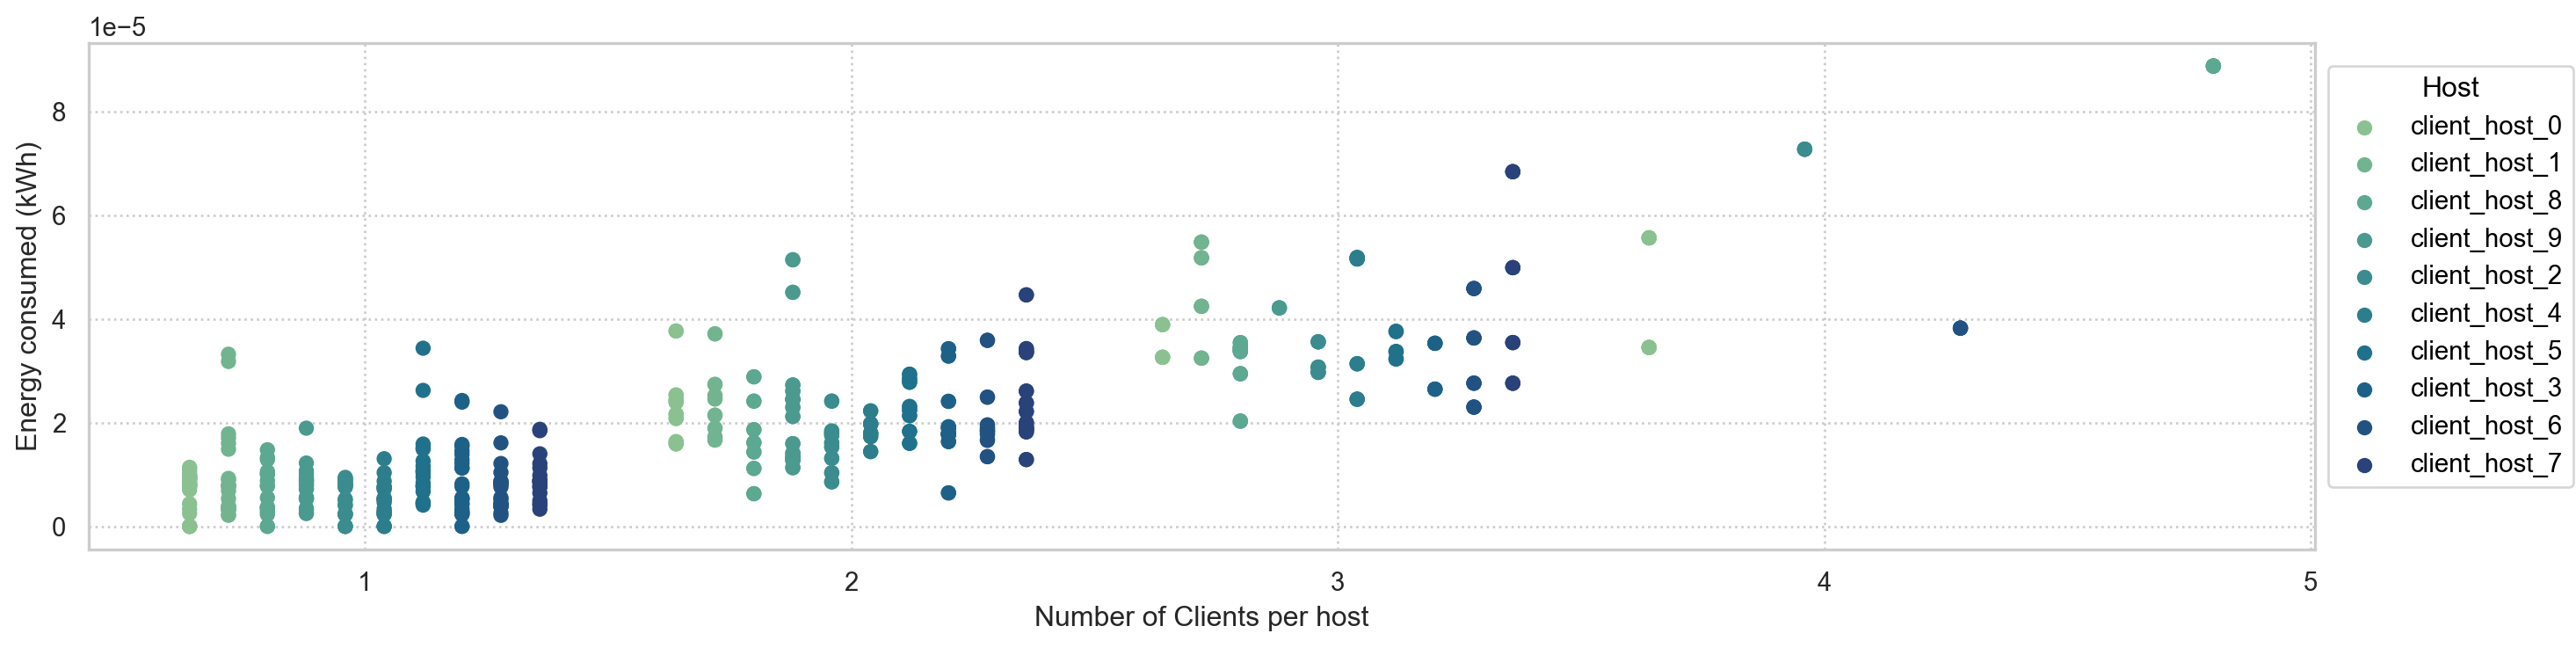

In [ ]:
sf1 = plt.Figure(figsize=(14, 4))
(
    so.Plot(
        # fittime_stats[fittime_stats["server_round"]<12], x="server_round", y="fittime",
        # pointsize=('fittime', 'count'), color="Client ID",
        round_energy, x=('fittime', 'count'), y="energy_kWh",
        color="hostname",
    )
    # .facet(col=('fittime', 'count'))
    .add(so.Dot(), so.Dodge())
    .layout(engine="tight")
    .scale(color="crest", pointsize=(5, 11))
    .label(x="Number of Clients per host", y="Energy consumed (kWh)", color="Host")
    .on(sf1)
)

un peu plus de variabilité avec l'énergie : les hosts ne consomment pas pareil (c'est attendu).
mais on voit bien que plus il y a de client par host plus la consommation d'énergie est forte, elle est même presque proportionnelle.

TODO : répartir l'énergie par clients et voir si on est équivalent


In [ ]:
round_energy["energy_kWh_per_client"] = round_energy["energy_kWh"] / round_energy[('fittime', 'count')]

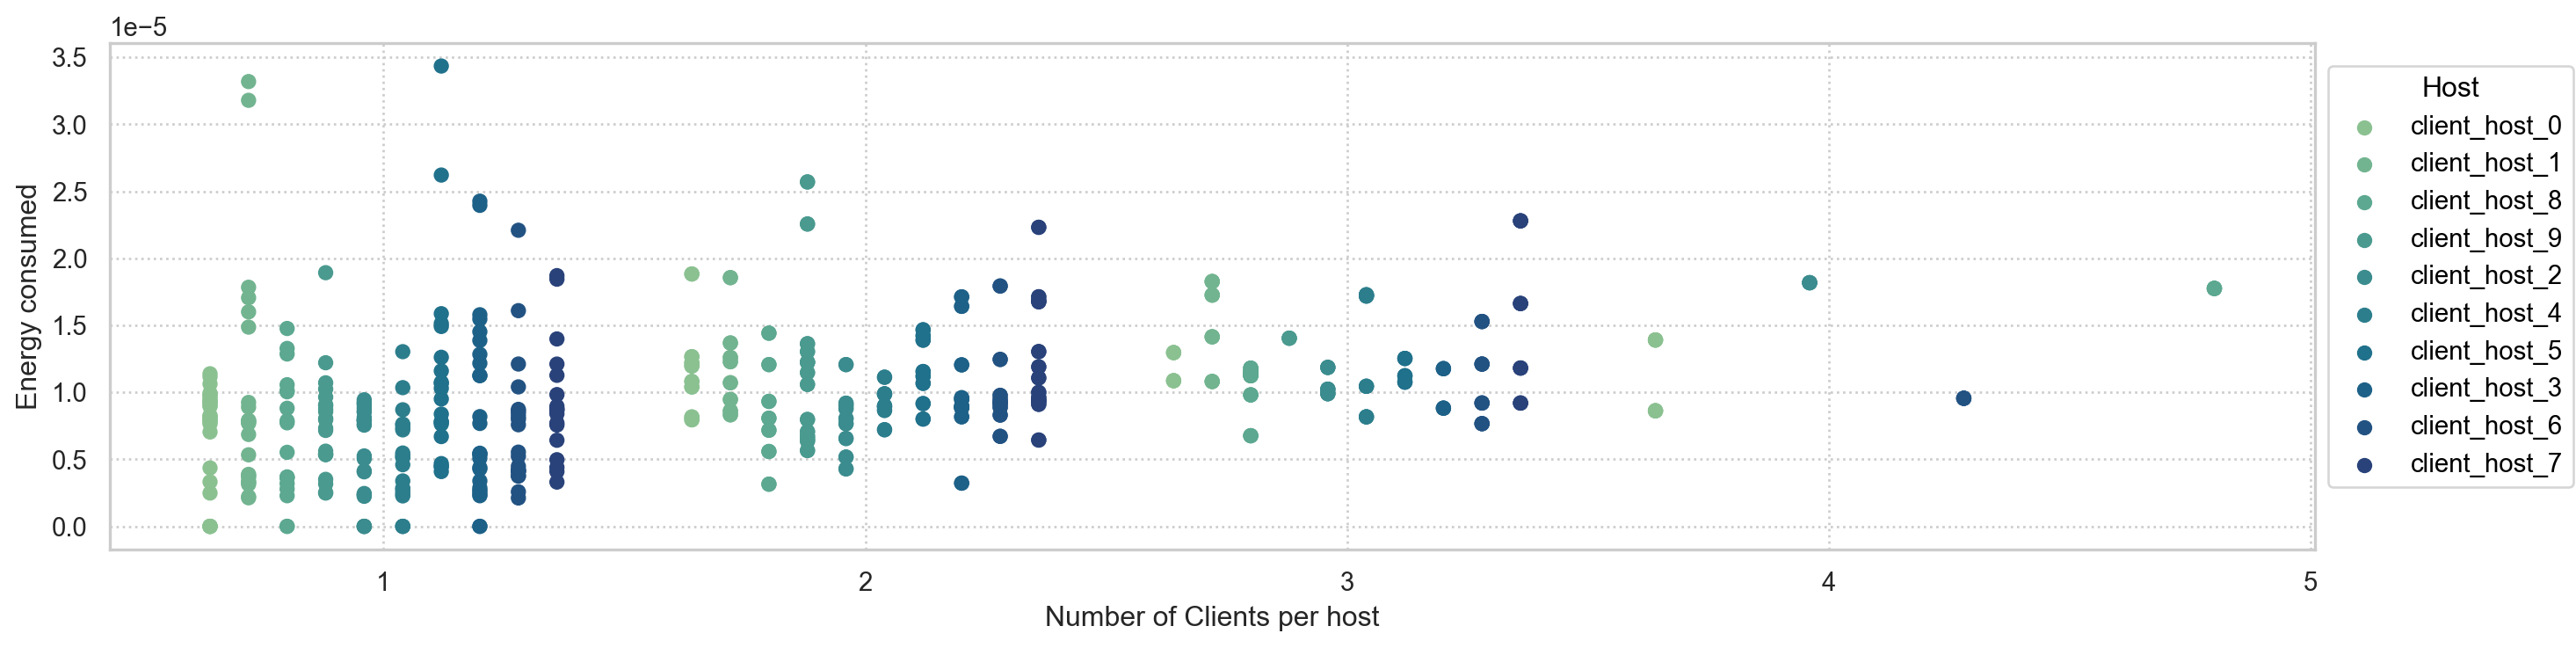

In [ ]:
sf1 = plt.Figure(figsize=(14, 4))
(
    so.Plot(
        # fittime_stats[fittime_stats["server_round"]<12], x="server_round", y="fittime",
        # pointsize=('fittime', 'count'), color="Client ID",
        round_energy, x=('fittime', 'count'), y="energy_kWh_per_client",
        color="hostname",
    )
    # .facet(col=('fittime', 'count'))
    .add(so.Dot(), so.Dodge())
    .layout(engine="tight")
    .scale(color="crest", pointsize=(5, 11))
    .label(x="Number of Clients per host", y="Energy consumed", color="Host", Title="Energy consumed per client")
    .on(sf1)
)


In [10]:
round_energy.groupby([('fittime', 'count')])["energy_kWh_per_client"].mean()

NameError: name 'round_energy' is not defined

In [ ]:
round_energy.groupby([('fittime', 'count')])["energy_kWh_per_client"].describe()

count      mean       std       min       25%       50%  \
(fittime, count)                                                            
1                 221.0  0.000008  0.000006  0.000000  0.000004  0.000008   
2                 186.0  0.000011  0.000004  0.000003  0.000008  0.000010   
3                 102.0  0.000012  0.000003  0.000007  0.000010  0.000011   
4                  16.0  0.000013  0.000004  0.000009  0.000009  0.000012   
5                   5.0  0.000018  0.000000  0.000018  0.000018  0.000018   

                       75%       max  
(fittime, count)                      
1                 0.000010  0.000034  
2                 0.000012  0.000026  
3                 0.000014  0.000023  
4                 0.000015  0.000018  
5                 0.000018  0.000018

In [ ]:
training_results[training_results["round_role"]=="train"].groupby("server_round").count()["train_acc"].unique()

array([10])

In [ ]:
training_results[training_results["round_role"]=="eval"].groupby("server_round").count()["eval_loss"].unique()

array([30])

In [ ]:
client_res[client_res["server_round"]==61]

Client ID          Start Time            End Time  fittime  server_round  \
3           4 2024-02-28 11:35:21 2024-02-28 11:35:33     12.0            61   
16          4                 NaT                 NaT      NaN            61   

    train_loss  train_acc  val_loss   val_acc      lr  local_epochs  \
3     0.514912   0.833659  0.492342  0.807692  0.0316           5.0   
16         NaN        NaN       NaN       NaN     NaN           NaN   

   round_role           eval_time  eval_loss  eval_accuracy  
3       train                 NaT        NaN            NaN  
16       eval 2024-02-28 11:35:51   1.256561       0.538462

In [ ]:
counts = client_res.groupby(["server_round"]).count()["Client ID"]
counts[counts>1]

server_round
61     2
91     2
100    2
146    2
180    2
193    2
320    2
322    2
345    2
373    2
375    2
Name: Client ID, dtype: int64

In [ ]:
result = EnergyResult(result_folder, 6, "2024-01-20","22-40-32","22-40-25")
clients = result._read_all_clients()
server = result._read_server()

In [ ]:
styled_df = clients[5].energy[["timestamp", "tot inst power"]].head(10).style.background_gradient(cmap='Blues', subset=['tot inst power'])
styled_df

In [ ]:
clients[5].fittimes.head(10)

Client ID  Server Round          Start Time            End Time  fittime
0          5             1 2024-01-20 22:40:55 2024-01-20 22:41:23     28.0
1          5             2 2024-01-20 22:41:34 2024-01-20 22:41:58     24.0
2          5             3 2024-01-20 22:42:14 2024-01-20 22:42:33     19.0
3          5             4 2024-01-20 22:42:44 2024-01-20 22:43:03     19.0
4          5             5 2024-01-20 22:43:13 2024-01-20 22:43:33     20.0
5          5             6 2024-01-20 22:43:46 2024-01-20 22:44:06     20.0
6          5             7 2024-01-20 22:44:16 2024-01-20 22:44:36     20.0
7          5             8 2024-01-20 22:44:45 2024-01-20 22:45:05     20.0
8          5             9 2024-01-20 22:45:14 2024-01-20 22:45:34     20.0
9          5            10 2024-01-20 22:45:44 2024-01-20 22:46:03     19.0

In [ ]:
for client_id in range(6):
    for round_id in range(len(clients[client_id].fittimes)):
        start_time, end_time = clients[client_id].fittimes.at[round_id,"Start Time"], clients[client_id].fittimes.at[round_id,"End Time"]
        energy_df = clients[client_id].energy[(clients[client_id].energy["timestamp"]>=start_time) & (clients[client_id].energy["timestamp"]<=end_time)]
        energy_kWh, energy_J = compute_energy(energy_df)
        clients[client_id].fittimes.at[round_id,"energy_kWh"] = energy_kWh
        clients[client_id].fittimes.at[round_id,"energy_J"] = energy_J

In [ ]:
clients[client_id].fittimes.style.background_gradient(cmap='plasma', subset=['energy_J'])

In [ ]:
clients[client_id].fittimes["energy_kWh"].agg(["sum","mean","std"])

sum     0.001749
mean    0.000087
std     0.000005
Name: energy_kWh, dtype: float64

In [ ]:
energy_df.style.background_gradient(cmap='viridis', subset=['tot inst power'])